# Analysis of the ultrabroad source in field aa

The coordinates are roughly (ironically) 17:45:57.7530532310 -28:57:10.7694483833 ICRS.

## Detections

There are three confident (SNR > 10) lines detected (see [Fit lines](#Fit_lines)).

These are CS 2-1, SO 3(2)-2(1), SO 2(2)-1(1), and SO2 2(2,0)-3(1,3), in rough order of brightness (SO 32 may be brighter than CS 2-1).

No other lines are detected, and the H-bearing species appear to have restrictive upper limits (see [Overplot](# Overplot all the lines (to show nondetections)).

The pair of SO lines gives a temperature of roughly 15K.

The SO lines are optically thin, but at $\tau\sim0.1-0.2$, so it is not likely that the filling factor is small.  That puts the gas size at the source size, which is roughly 1".  The beam size is 1.5", but the source may be slightly resolved, giving a deconvolved size ~0.8".


In [38]:
%matplotlib inline
import pylab as pl

In [171]:
from spectral_cube import SpectralCube
from astropy import units as u, constants
from astropy.coordinates import SkyCoord
import pyspeckit
import glob
import radio_beam

In [8]:
from astropy import stats

In [9]:
from astropy.modeling.functional_models import Gaussian2D
from astropy.modeling.fitting import LevMarLSQFitter
import numpy as np
from astropy.table import Table

In [10]:
path = '/orange/adamginsburg/ACES/data/2021.1.00172.L/science_goal.uid___A001_X1590_X30a8/group.uid___A001_X1590_X30a9/member.uid___A001_X15a0_X13c/calibrated/working/'

In [11]:
cd $path

/orange/adamginsburg/ACES/rawdata/2021.1.00172.L/science_goal.uid___A001_X1590_X30a8/group.uid___A001_X1590_X30a9/member.uid___A001_X15a0_X13c/calibrated/working


In [12]:
ls -d *image

uid___A001_X15a0_X13c.s38_0.Sgr_A_star_sci.spw25.cube.I.iter1.image/
uid___A001_X15a0_X13c.s38_0.Sgr_A_star_sci.spw27.cube.I.iter1.image/
uid___A001_X15a0_X13c.s38_0.Sgr_A_star_sci.spw29.cube.I.iter1.image/
uid___A001_X15a0_X13c.s38_0.Sgr_A_star_sci.spw31.cube.I.iter1.image/
uid___A001_X15a0_X13c.s38_0.Sgr_A_star_sci.spw33.cube.I.iter1.reclean.image@
uid___A001_X15a0_X13c.s38_0.Sgr_A_star_sci.spw35.cube.I.iter1.image/
uid___A001_X15a0_X13c.s8_0.Sgr_A_star_sci.spw25.mfs.I.iter1.image/
uid___A001_X15a0_X13c.s8_0.Sgr_A_star_sci.spw27.mfs.I.iter1.image/
uid___A001_X15a0_X13c.s8_0.Sgr_A_star_sci.spw29.mfs.I.iter1.image/
uid___A001_X15a0_X13c.s8_0.Sgr_A_star_sci.spw31.mfs.I.iter1.image/
uid___A001_X15a0_X13c.s8_0.Sgr_A_star_sci.spw33.mfs.I.iter1.image/
uid___A001_X15a0_X13c.s8_0.Sgr_A_star_sci.spw35.mfs.I.iter1.image/


In [13]:
coord = SkyCoord("17:45:57.7530532310 -28:57:10.7694483833", unit=(u.h, u.deg), frame='icrs')
coord.galactic

<SkyCoord (Galactic): (l, b) in deg
    (0.0246741, -0.0727428)>

In [14]:
imgs = sorted(glob.glob("*.cube.*.image"))

In [15]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    cubes = [SpectralCube.read(fn) for fn in imgs]

In [16]:
pxcrd = [cube.wcs.celestial.world_to_pixel(coord) for cube in cubes]
spectra = [cube[:, int(y), int(x)].to(u.K) for cube, (x,y) in zip(cubes, pxcrd)]

In [17]:
pspectra = pyspeckit.Spectra([pyspeckit.Spectrum.from_hdu(sp.hdu) for sp in spectra])

INFO: Creating spectra [pyspeckit.spectrum.classes]
INFO: Concatenating data [pyspeckit.spectrum.classes]


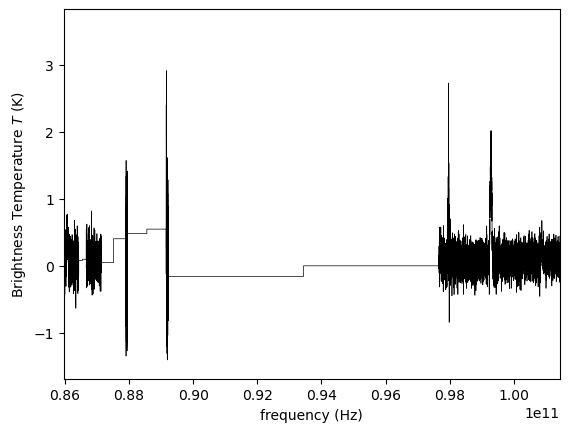

In [18]:
pspectra.plotter()

# Fit lines

In [19]:
from astroquery.splatalogue import Splatalogue
from astroquery.splatalogue.utils import minimize_table

In [20]:
#Splatalogue.query_lines(97.98095 * (1-30/3e5) *u.GHz, 97.98095 * (1+30/3e5)*u.GHz, energy_max=100, energy_type='eu_k')

In [208]:
nurest_so32 = 99.29987e9*u.Hz	
nurest_so21 = 86.09395e9*u.Hz
nurest_cs21 = 97.98095e9*u.Hz
nurest_so45 = 100.02956e9*u.Hz
nurest_h13cop = 86.7543*u.GHz
nurest_c34s21 = 96.412951*u.GHz

### Table

In [22]:
measurement_table = []

### spw33 

In [23]:
# rough Jy to Kelvin estimate to change my guesses, that were in Jy, to K
JtoK = cubes[0].beam.jtok(cubes[0].spectral_axis).mean().value
JtoK

54.2808632681691

Error 'FigureManagerBase' object has no attribute 'key_press' was raised when trying to connect the key_press handler.  Please file an issue on github.  You may try a different matplotlib backend as a temporary workaround
Param #0   AMPLITUDE0 =     0.916434 +/-       0.0275603 
Param #1       SHIFT0 =  9.79603e+10 +/-          668082 
Param #2       WIDTH0 =  1.92385e+07 +/-          668082   Range:   [0,inf)
Param #3   AMPLITUDE1 =      1.71866 +/-       0.0253826 
Param #4       SHIFT1 =  9.92861e+10 +/-          386802 
Param #5       WIDTH1 =  2.26814e+07 +/-          386802   Range:   [0,inf) 
 Velocity width sigma(CS) = 58.87640757884788 km / s  FWHM(CS) =  138.35955781029253 km / s  VLSR(CS) =  63.288838560016764 km / s  SNR :  33.251929764963656 
 Velocity width sigma(SO) = 68.48604440209336 km / s  FWHM(SO) =  160.94220434491936 km / s  VLSR(SO) =  41.47102942141959 km / s  SNR :  67.71010763385557


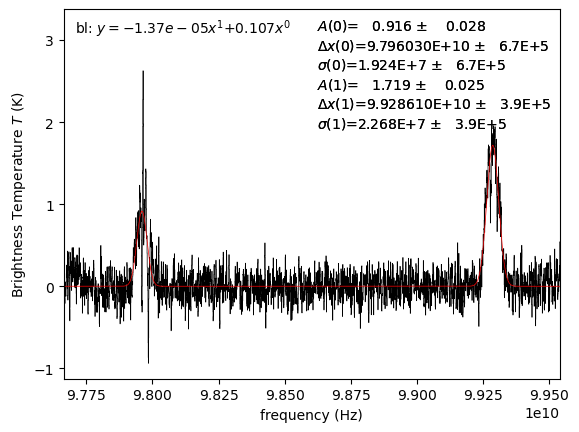

In [25]:
spw33 = pspectra[-2]
spw33.plotter()
spw33.specfit(guesses=[0.06*JtoK, 97.98e9, 97.8e9/3000, 0.06*JtoK, 99.3e9, 2e7])
spw33.baseline(excludefit=True)
spw33.specfit(guesses=[0.06*JtoK, 97.98e9, 97.8e9/3000, 0.06*JtoK, 99.3e9, 2e7])
measurement_table.append(['CS 2-1', 97.98095e9] + list(zip(spw33.specfit.parinfo.values[:3], spw33.specfit.parinfo.errors[:3])))
measurement_table.append(['SO 3(2)-2(1)', 99.2998e9] + list(zip(spw33.specfit.parinfo.values[3:6], spw33.specfit.parinfo.errors[3:6])))
                         
print(spw33.specfit.fitter.parinfo,
      "\n Velocity width sigma(CS) =",
      spw33.specfit.parinfo['WIDTH0'].value/spw33.specfit.parinfo['SHIFT0'].value * constants.c.to(u.km/u.s),
      " FWHM(CS) = ",
      2.35*spw33.specfit.parinfo['WIDTH0'].value/spw33.specfit.parinfo['SHIFT0'].value * constants.c.to(u.km/u.s),
      " VLSR(CS) = ",
      -(spw33.specfit.parinfo['SHIFT0'].value - 97.98095e9) / 97.98095e9 * constants.c.to(u.km/u.s),
      " SNR : ", spw33.specfit.parinfo['AMPLITUDE0'].value / spw33.specfit.parinfo['AMPLITUDE0'].error,
      "\n Velocity width sigma(SO) =",
      spw33.specfit.parinfo['WIDTH1'].value/spw33.specfit.parinfo['SHIFT1'].value * constants.c.to(u.km/u.s),
      " FWHM(SO) = ",
      2.35*spw33.specfit.parinfo['WIDTH1'].value/spw33.specfit.parinfo['SHIFT1'].value * constants.c.to(u.km/u.s),
      " VLSR(SO) = ",
      -(spw33.specfit.parinfo['SHIFT1'].value - 99.2998e9) / 99.29987e9 * constants.c.to(u.km/u.s),
      " SNR : ", spw33.specfit.parinfo['AMPLITUDE1'].value / spw33.specfit.parinfo['AMPLITUDE1'].error
     )

### spw25

Error 'FigureManagerBase' object has no attribute 'key_press' was raised when trying to connect the key_press handler.  Please file an issue on github.  You may try a different matplotlib backend as a temporary workaround
Param #0   AMPLITUDE0 =     0.382843 +/-       0.0261676 
Param #1       SHIFT0 =  8.60829e+10 +/-     1.53617e+06 
Param #2       WIDTH0 =  1.94643e+07 +/-     1.53617e+06   Range:   [0,inf) 
 Velocity width sigma(SO21) = 67.78625351080638 km / s  FWHM(SO) =  159.29769575039498 km / s  VLSR(SO2(2)-1(1)):  38.46949335809995 km / s  SNR :  14.630446729382609


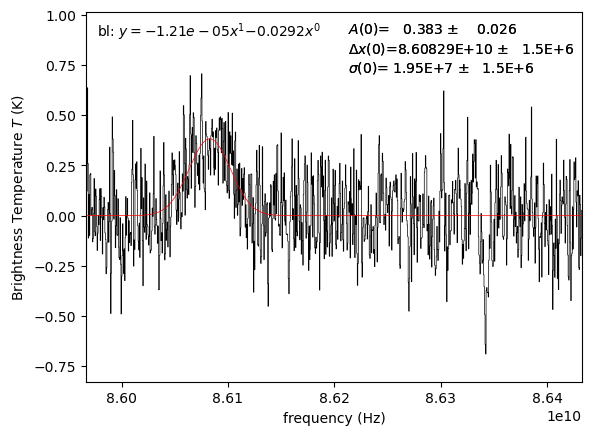

In [26]:
spw25 = pspectra[0]
spw25.data -= np.median(spw25.data) # contsub
spw25.plotter()
spw25.specfit(guesses=[0.06*JtoK, 86.09395e9, 2e7])
spw25.baseline(excludefit=True)
spw25.specfit(guesses=[0.06*JtoK, 86.09395e9, 2e7])
measurement_table.append(['SO 2(2)-1(1)', 86.09395e9] + list(zip(spw25.specfit.parinfo.values[:3], spw25.specfit.parinfo.errors[:3])))
print(spw25.specfit.fitter.parinfo,
      "\n Velocity width sigma(SO21) =",
      spw25.specfit.parinfo['WIDTH0'].value/spw25.specfit.parinfo['SHIFT0'].value * constants.c.to(u.km/u.s),
      " FWHM(SO) = ",
      2.35*spw25.specfit.parinfo['WIDTH0'].value/spw25.specfit.parinfo['SHIFT0'].value * constants.c.to(u.km/u.s),
      " VLSR(SO2(2)-1(1)): ",
      -(spw25.specfit.parinfo['SHIFT0'].value - 86.09395e9) / 86.09395e9 * constants.c.to(u.km/u.s),
      " SNR : ", spw25.specfit.parinfo['AMPLITUDE0'].value / spw25.specfit.parinfo['AMPLITUDE0'].error
     )

### spw 35

In [27]:
nurest_so45

<Quantity 1.0002956e+11 Hz>

Error 'FigureManagerBase' object has no attribute 'key_press' was raised when trying to connect the key_press handler.  Please file an issue on github.  You may try a different matplotlib backend as a temporary workaround
Param #0   AMPLITUDE0 =     0.171514 +/-       0.0286755   Range:[0.05,2.71404]
Param #1       SHIFT0 =  1.00875e+11 +/-     4.79635e+06   Range:[1.008e+11,1.009e+11]
Param #2       WIDTH0 =  2.48427e+07 +/-     4.79635e+06   Range:[1.5e+07,4e+07]
Param #3   AMPLITUDE1 =    0.0583502 +/-       0.0301321   Range:[0.05,2.71404]
Param #4       SHIFT1 =  1.00017e+11 +/-     1.09545e+07   Range:[9.99962e+10,1.00063e+11]
Param #5       WIDTH1 =      1.5e+07 +/-               0   Range:[1.5e+07,4e+07] 
 Velocity width sigma(SO2 220) = 73.8305414850214 km / s  FWHM(SO2) =  173.50177248980032 km / s  VLSR(SO2):  9.873140723249119 km / s  SNR :  5.981206517501485


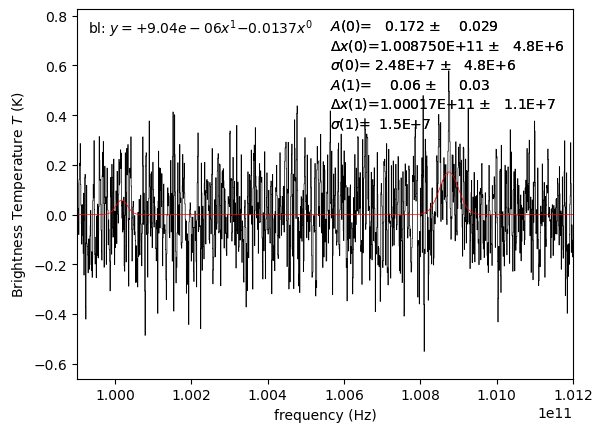

In [28]:
# Not a good fit

spw35 = pspectra[-1].copy()
spw35.data -= np.median(spw35.data) # contsub
spw35.plotter(xmin=99.9e9, xmax=101.2e9)
#spw35.plotter(xmin=100.55e9, xmax=101.2e9)
spw35.specfit(guesses=[0.006*JtoK, 100.878105e9, 1e7, 0.2, nurest_so45.to(u.Hz).value, 1e7],
              limits=[(0, 0.05*JtoK), (100.8e9, 100.9e9), (0, 4e7),
                      (0, 0.05*JtoK), (99.99e9, 100.2e9), (0, 4e7),
                     ], limited=[(True, True)]*6)
spw35.baseline(excludefit=True)
spw35.specfit(guesses=[0.006*JtoK, 100.878105e9, 2e7, 0.2, nurest_so45.to(u.Hz).value, 2e7],
              limits=[(0.05, 0.05*JtoK), (100.8e9, 100.9e9), (1.5e7, 4e7),
                      (0.05, 0.05*JtoK), (nurest_so45.value*(1-100/3e5), nurest_so45.value*(1+100/3e5)), (1.5e7, 4e7),
                     ], limited=[(True, True)]*6)
measurement_table.append(['SO2 2(2,0)-3(1,3)', 100.878105e9] + list(zip(spw35.specfit.parinfo.values[:3], spw35.specfit.parinfo.errors[:3])))
print(spw35.specfit.fitter.parinfo,
      "\n Velocity width sigma(SO2 220) =",
      spw35.specfit.parinfo['WIDTH0'].value/spw35.specfit.parinfo['SHIFT0'].value * constants.c.to(u.km/u.s),
      " FWHM(SO2) = ",
      2.35*spw35.specfit.parinfo['WIDTH0'].value/spw35.specfit.parinfo['SHIFT0'].value * constants.c.to(u.km/u.s),
      " VLSR(SO2): ",
      -(spw35.specfit.parinfo['SHIFT0'].value - 100.878105e9) / 100.878105e9 * constants.c.to(u.km/u.s),
      " SNR : ", spw35.specfit.parinfo['AMPLITUDE0'].value / spw35.specfit.parinfo['AMPLITUDE0'].error
     )
#spw35.specfit.parinfo

## Tsuboi C34S

In [128]:
fns_2012 = glob.glob("/orange/adamginsburg/ACES/ancillary/data/2012.1.00080.S/science_goal.uid___A002_X6444ba_Xc/group.uid___A002_X6444ba_Xd/member.uid___A002_X6444ba_Xe/calibrated/workdir/*.image.pbcor.fits")
scubes2012 = [SpectralCube.read(fn, format='fits').subcube_from_regions([region]) for fn in fns_2012]

In [138]:
c34scube_2012 = [scube for scube in scubes2012 if scube.spectral_axis.min() < 96.412951*u.GHz and scube.spectral_axis.max() > 96.412951*u.GHz][0]
c34scube_2012

VaryingResolutionSpectralCube with shape=(3712, 60, 60) and unit=Jy / beam:
 n_x:     60  type_x: RA---SIN  unit_x: deg    range:   266.488324 deg:  266.493008 deg
 n_y:     60  type_y: DEC--SIN  unit_y: deg    range:   -28.955044 deg:  -28.950946 deg
 n_s:   3712  type_s: FREQ      unit_s: Hz     range: 96180400540.670 Hz:97086349711.145 Hz

Error 'FigureManagerBase' object has no attribute 'key_press' was raised when trying to connect the key_press handler.  Please file an issue on github.  You may try a different matplotlib backend as a temporary workaround
Param #0   AMPLITUDE0 =     0.138535 +/-       0.0213704   Range:[0,2.71404]
Param #1       SHIFT0 =  9.63966e+10 +/-     3.40094e+06   Range:[9.62e+10,9.7e+10]
Param #2       WIDTH0 =  1.90922e+07 +/-     3.40094e+06   Range: [0,4e+07] 
 Velocity width sigma(C34S) = 59.37652055823241 km / s  FWHM(C34S) =  139.53482331184617 km / s  VLSR(C34s):  50.77006796531648 km / s  SNR :  6.4825676517965825


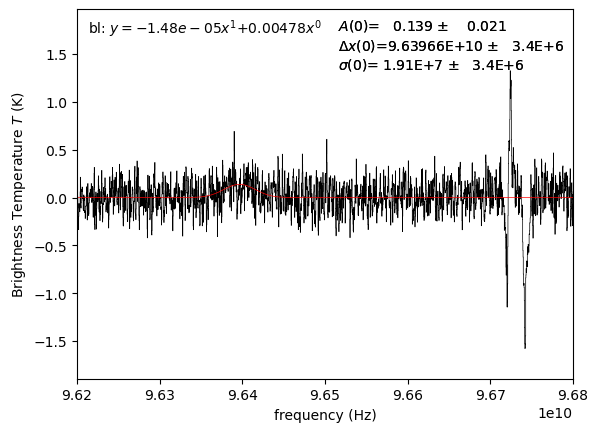

In [226]:
cube = c34scube_2012
pxcrd = cube.wcs.celestial.world_to_pixel(coord)
x,y=pxcrd
spc34s = pyspeckit.Spectrum.from_hdu(cube[:, int(y), int(x)].to(u.K).hdu)

nurest_c34s21 = 96.412951*u.GHz

spc34s.data -= np.median(spc34s.data) # contsub
spc34s.plotter(xmin=96.2e9, xmax=96.8e9)
#spc34s.plotter(xmin=100.55e9, xmax=101.2e9)
spc34s.specfit(guesses=[0.006*JtoK, nurest_c34s21.to(u.Hz).value, 1e7, ],
              limits=[(0, 0.05*JtoK), (96.2e9, 97e9), (0, 4e7),
                     ], limited=[(True, True)]*3)
spc34s.baseline(excludefit=True)
spc34s.specfit(guesses=[0.006*JtoK, nurest_c34s21.to(u.Hz).value, 1e7, ],
              limits=[(0, 0.05*JtoK), (96.2e9, 97e9), (0, 4e7),
                     ], limited=[(True, True)]*3)
measurement_table.append(['C34S 2-1', nurest_c34s21.to(u.Hz).value] + list(zip(spc34s.specfit.parinfo.values[:3], spc34s.specfit.parinfo.errors[:3])))
print(spc34s.specfit.fitter.parinfo,
      "\n Velocity width sigma(C34S) =",
      spc34s.specfit.parinfo['WIDTH0'].value/spc34s.specfit.parinfo['SHIFT0'].value * constants.c.to(u.km/u.s),
      " FWHM(C34S) = ",
      2.35*spc34s.specfit.parinfo['WIDTH0'].value/spc34s.specfit.parinfo['SHIFT0'].value * constants.c.to(u.km/u.s),
      " VLSR(C34s): ",
      -(spc34s.specfit.parinfo['SHIFT0'].value - nurest_c34s21.to(u.Hz).value) / nurest_c34s21.to(u.Hz).value * constants.c.to(u.km/u.s),
      " SNR : ", spc34s.specfit.parinfo['AMPLITUDE0'].value / spc34s.specfit.parinfo['AMPLITUDE0'].error
     )

### Spectral Measurement Table

In [144]:
meastable = Table(list(zip(*measurement_table)),
      names=('Line', 'Rest Frequency', 'Amplitude / Error', 'Center / Error', 'Width / Error')
     )
vcen = (meastable['Rest Frequency'] - meastable['Center / Error'][:,0]) / meastable['Rest Frequency'] * constants.c.to(u.km/u.s)
evcen = (meastable['Center / Error'][:,1]) / meastable['Rest Frequency'] * constants.c.to(u.km/u.s)
width = (meastable['Width / Error'][:,0]) / meastable['Rest Frequency'] * constants.c.to(u.km/u.s)
ewidth = (meastable['Width / Error'][:,1]) / meastable['Rest Frequency'] * constants.c.to(u.km/u.s)
meastable.add_column(vcen, name="Velocity Center")
meastable.add_column(evcen, name="e_vcen")
meastable.add_column(width, name="Width (sigma)")
meastable.add_column(ewidth, name="e_width")

meastable['Rest Frequency'].unit = u.Hz
meastable['Amplitude / Error'].unit = u.K
meastable['Center / Error'].unit = u.Hz
meastable['Width / Error'].unit = u.Hz

meastable.write('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/spectral_fits.ecsv', overwrite=True)
meastable.write('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/spectral_fits.tex', overwrite=True)
meastable

Line,Rest Frequency,Amplitude / Error,Center / Error,Width / Error,Velocity Center,e_vcen,Width (sigma),e_width
,Hz,K,Hz,Hz,km / s,km / s,km / s,km / s
str17,float64,float64[2],float64[2],float64[2],float64,float64,float64,float64
CS 2-1,97980950000.0,0.9164335009129558 .. 0.02756031025539361,97960265355.13643 .. 668082.3584646374,19238471.001098715 .. 668082.3625404261,63.288838560016764,2.044132582818913,58.863978248640215,2.0441325952896094
SO 3(2)-2(1),99299800000.0,1.7186578693720387 .. 0.02538258953398409,99286063604.30217 .. 386801.66014391225,22681390.338756632 .. 386801.6572947594,41.4710586558396,1.1677789930395035,68.47657055213911,1.1677789844377284
SO 2(2)-1(1),86093950000.0,0.3828433596099744 .. 0.026167578249070324,86082902388.39632 .. 1536167.511113989,19464256.983562384 .. 1536167.5016688446,38.46949335809995,5.349173014556831,67.77755515045868,5.349172981667376
"SO2 2(2,0)-3(1,3)",100878105000.0,0.17151400547254475 .. 0.028675486287036096,100874782755.89418 .. 4796354.816369068,24842652.422735624 .. 4796354.780898648,9.873140723249119,14.253945391216671,73.82811000515491,14.253945285804658
C34S 2-1,96412951000.0,0.13853527520451572 .. 0.02137043261956888,96396623397.53908 .. 3400937.958181477,19092195.077529825 .. 3400937.960167873,50.77006796531648,10.575089128728424,59.36646510185304,10.575089134905047


In [30]:
cat /orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/spectral_fits.tex

\begin{table}
\begin{tabular}{ccccccccc}
Line & Rest Frequency & Amplitude / Error & Center / Error & Width / Error & Velocity Center & e_vcen & Width (sigma) & e_width \\
 & $\mathrm{Hz}$ & $\mathrm{K}$ & $\mathrm{Hz}$ & $\mathrm{Hz}$ & $\mathrm{km\,s^{-1}}$ & $\mathrm{km\,s^{-1}}$ & $\mathrm{km\,s^{-1}}$ & $\mathrm{km\,s^{-1}}$ \\
CS 2-1 & 97980950000.0 & 0.9164335009129558 .. 0.02756031025539361 & 97960265355.13643 .. 668082.3584646374 & 19238471.001098715 .. 668082.3625404261 & 63.288838560016764 & 2.044132582818913 & 58.863978248640215 & 2.0441325952896094 \\
SO 3(2)-2(1) & 99299800000.0 & 1.7186578693720387 .. 0.02538258953398409 & 99286063604.30217 .. 386801.66014391225 & 22681390.338756632 .. 386801.6572947594 & 41.4710586558396 & 1.1677789930395035 & 68.47657055213911 & 1.1677789844377284 \\
SO 2(2)-1(1) & 86093950000.0 & 0.3828433596099744 .. 0.026167578249070324 & 86082902388.39632 .. 1536167.511113989 & 19464256.983562384 .. 1536167.5016688446 & 38.46949335809995 & 5.349173

# Search for spatial gradients

In [31]:
import regions

In [32]:
region = regions.RectangleSkyRegion(center=coord, width=15*u.arcsec, height=15*u.arcsec)

In [250]:
bigregion = regions.RectangleSkyRegion(center=coord, width=35*u.arcsec, height=35*u.arcsec)

In [33]:
scubes = [cube.subcube_from_regions([region]) for cube in cubes]

In [34]:
# measure the surrounding ISM in an annulus
annulus = regions.CircleAnnulusSkyRegion(center=coord, inner_radius=3*u.arcsec, outer_radius=6*u.arcsec)

In [35]:
circle = regions.CircleSkyRegion(center=coord, radius=3*u.arcsec)

## Separate background

In [36]:
background_stddevs = [cube.subcube_from_regions([annulus]).std(axis=(1,2)) for cube in cubes]
background_means = [cube.subcube_from_regions([annulus]).mean(axis=(1,2)) for cube in cubes]

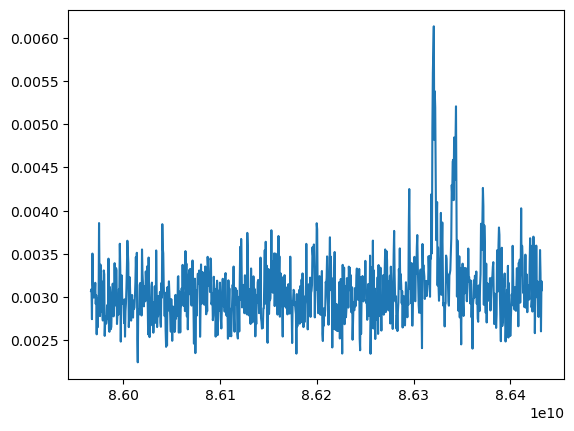

In [39]:
pl.plot(background_stddevs[0].spectral_axis, background_stddevs[0].value)

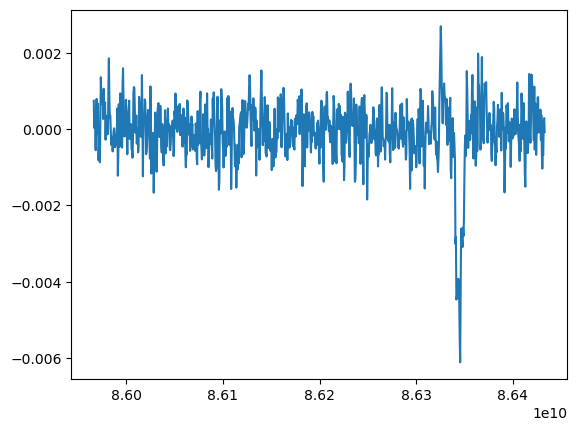

In [40]:
pl.plot(background_means[0].spectral_axis, background_means[0].value)

## Fitting channel-by-channel

In [41]:
coord.galactic

<SkyCoord (Galactic): (l, b) in deg
    (0.0246741, -0.0727428)>

In [44]:
so_scube = scubes[-2].with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value=99.29987*u.GHz).spectral_slab(-300*u.km/u.s, 300*u.km/u.s)
so_scube

DaskSpectralCube with shape=(408, 58, 58) and unit=Jy / beam and chunk size (60, 33, 58):
 n_x:     58  type_x: RA---SIN  unit_x: deg    range:   266.488258 deg:  266.492963 deg
 n_y:     58  type_y: DEC--SIN  unit_y: deg    range:   -28.955072 deg:  -28.950956 deg
 n_s:    408  type_s: VRAD      unit_s: km / s  range:     -300.055 km / s:     299.963 km / s

In [45]:
rows = []
for chan in range(so_scube.shape[0]):
    g_init = Gaussian2D(amplitude=0.06, x_mean=29, y_mean=29, x_stddev=3., y_stddev=3)
    fit_g = LevMarLSQFitter()
    y, x = np.mgrid[:so_scube.shape[1], :so_scube.shape[2]]
    g = fit_g(g_init, x, y, z=so_scube[chan, :, :].value)
    rows.append(g.parameters)
    #print(chan, g.parameters)
tb = Table(np.array(rows), names=g.param_names)

In [46]:
%matplotlib inline
import pylab as pl

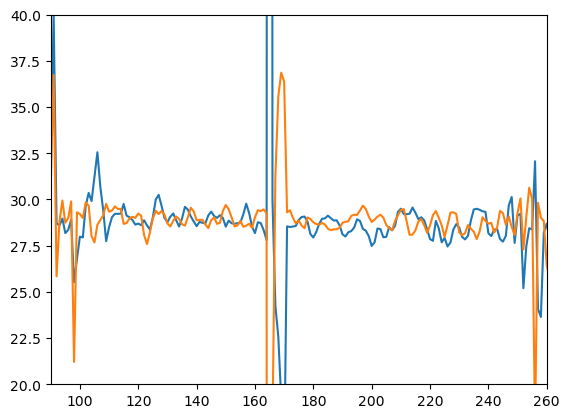

In [47]:
pl.plot(tb['x_mean'])
pl.plot(tb['y_mean'])
pl.ylim(20, 40);
pl.xlim(90,260);

(-0.01, 0.05)

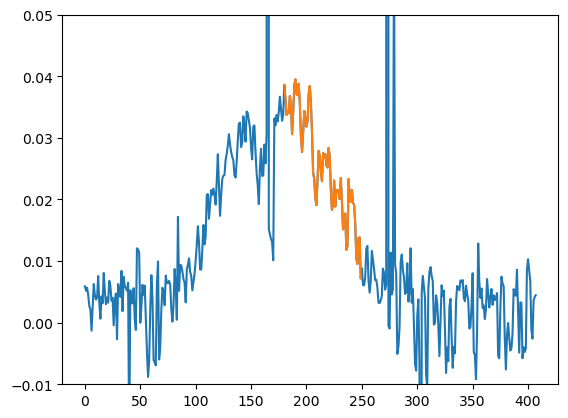

In [48]:
pl.plot(tb['amplitude'])
pl.plot(np.arange(len(tb))[180:250], tb['amplitude'][180:250])
pl.ylim([-0.01, 0.05])

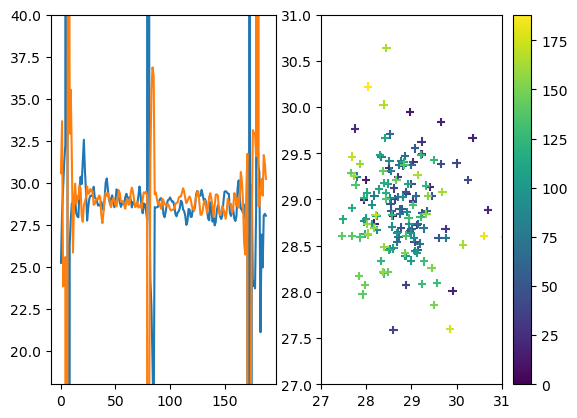

In [49]:
sel = tb['amplitude'] > 0.008
pl.subplot(1,2,1)
pl.plot(tb['x_mean'][sel])
pl.plot(tb['y_mean'][sel])
pl.ylim(18, 40);
pl.subplot(1,2,2)
pl.scatter(tb['x_mean'][sel], tb['y_mean'][sel], c=np.arange(len(tb[sel])), marker='+')
pl.colorbar()
pl.axis([27,31,27,31]);

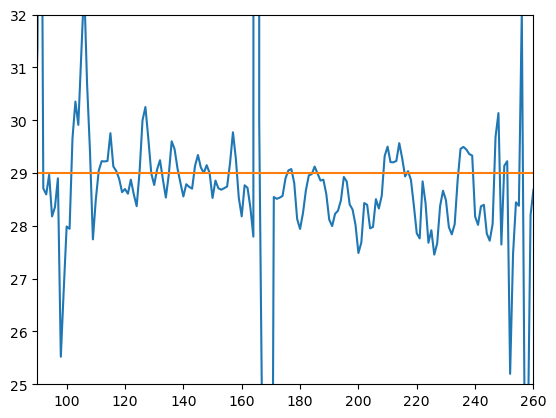

In [50]:
pl.plot(tb['x_mean'])
pl.plot([0,400], [29, 29])
pl.ylim(25, 32);
pl.xlim(90,260);

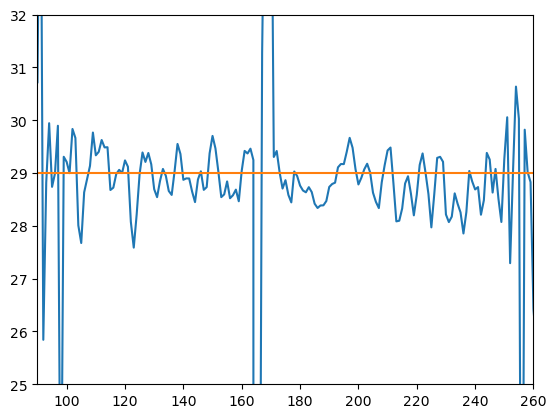

In [51]:
pl.plot(tb['y_mean'])
pl.plot([0,400], [29, 29])
pl.ylim(25, 32);
pl.xlim(90,260);

In [53]:
pixscale = so_scube.wcs.celestial.proj_plane_pixel_scales()[0].to(u.arcsec)
pixscale

<Quantity 0.26 arcsec>

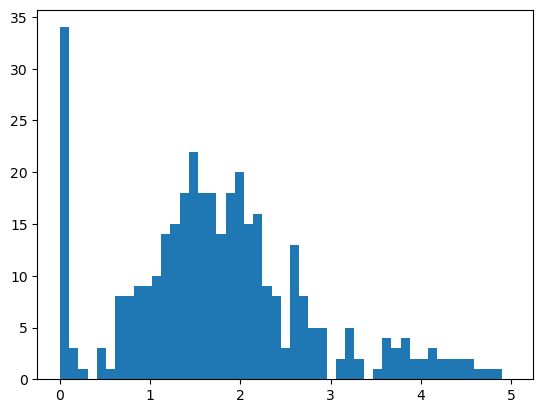

In [54]:
pl.hist(tb['x_stddev']*pixscale.value*2.35, bins=np.linspace(0,5));

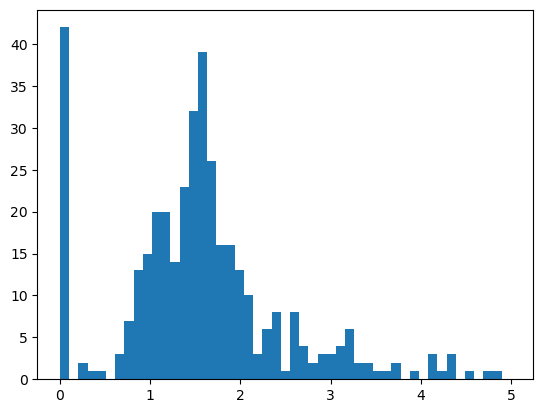

In [55]:
pl.hist(tb['y_stddev']*pixscale.value*2.35, bins=np.linspace(0,5));

(<Quantity 1.75846813 arcsec>,
 <Quantity 1.58360147 arcsec>,
 <Gaussian2D(amplitude=0.02563195, x_mean=28.54175745, y_mean=28.78748886, x_stddev=2.87801657, y_stddev=2.5918191, theta=0.17038562)>)

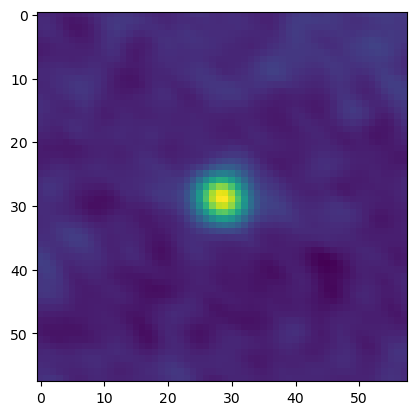

In [56]:
avgim = so_scube[180:250].mean(axis=0)
avgim.quicklook()
g_init = Gaussian2D(amplitude=0.06, x_mean=29, y_mean=29, x_stddev=3., y_stddev=3)
fit_g = LevMarLSQFitter()
y, x = np.mgrid[:so_scube.shape[1], :so_scube.shape[2]]
g = fit_g(g_init, x, y, z=avgim.value)
g.x_stddev * pixscale * 2.35, g.y_stddev * pixscale * 2.35, g

In [57]:
coord_fit = so_scube.wcs.celestial.pixel_to_world(g.x_mean, g.y_mean)
coord_fit, coord_fit.to_string('hmsdms'), coord_fit.galactic

(<SkyCoord (ICRS): (ra, dec) in deg
     (266.49060723, -28.95299327)>,
 '17h45m57.74573513s -28d57m10.77577293s',
 <SkyCoord (Galactic): (l, b) in deg
     (0.02465872, -0.07272093)>)

In [58]:
import radio_beam
# wouldn't deconvolve with theta as set; rotated 90 deg (probably not right?)
src = radio_beam.Beam(major=g.x_stddev*pixscale*2.35, minor=g.y_stddev*pixscale*2.35, pa=90*u.deg+g.theta*u.rad)
src, so_scube.beam, src.deconvolve(so_scube.beam)

(Beam: BMAJ=1.7584681250090228 arcsec BMIN=1.5836014702261407 arcsec BPA=99.76237710482135 deg,
 Beam: BMAJ=1.6255785371840412 arcsec BMIN=1.4396964064791222 arcsec BPA=-52.087786316534505 deg,
 Beam: BMAJ=0.8454143787624522 arcsec BMIN=0.4123675156659957 arcsec BPA=69.51613180241908 deg)

### Source fit leads to 1.5" size scale (so, beam-sized) - but it can deconvolve to ~0.8"

### Try again downsampled (higher S/N)

In [59]:
so_scube_ds = so_scube.downsample_axis(factor=10, axis=0)
so_scube_ds

In some cases, the final shape of the output from downsample_axis is incorrect, so use the result with caution


DaskSpectralCube with shape=(41, 58, 58) and unit=Jy / beam and chunk size (6, 33, 58):
 n_x:     58  type_x: RA---SIN  unit_x: deg    range:   266.488258 deg:  266.492963 deg
 n_y:     58  type_y: DEC--SIN  unit_y: deg    range:   -28.955072 deg:  -28.950956 deg
 n_s:     41  type_s: VRAD      unit_s: km / s  range:     -296.369 km / s:     293.329 km / s

In [60]:
rows = []
for chan in range(so_scube_ds.shape[0]):
    g_init = Gaussian2D(amplitude=0.06, x_mean=29, y_mean=29, x_stddev=3., y_stddev=3)
    fit_g = LevMarLSQFitter()
    y, x = np.mgrid[:so_scube.shape[1], :so_scube.shape[2]]
    g = fit_g(g_init, x, y, z=so_scube[chan, :, :].value)
    rows.append(g.parameters)
    #print(chan, g.parameters)
tb2 = Table(np.array(rows), names=g.param_names)
tb2

amplitude,x_mean,y_mean,x_stddev,y_stddev,theta
float64,float64,float64,float64,float64,float64
0.005905585860934528,26.328576906592797,34.62835040278195,2.223591493629204,6.143321726898192,1.4044253533118467
0.0051844463456161205,31.643804508650515,32.155286780698,8.430427514228322,1.617510322407969,-0.19444014117558736
0.005680080658306295,32.37743393773512,30.79586320983435,6.201328799229736,1.8372987093384185,0.01925491221517151
0.004466647678453937,34.49168760886746,28.42773038878257,6.863433086440286,1.6633525742944029,-0.41298774500885754
0.0026836125945029453,29.199514876698476,28.43392904383554,2.8346325397063814,1.1754943508222875e-38,-0.4846850113170254
0.0021286195737177833,29.669661772152843,24.388187229793648,1.4153751884510877,1.1754943508222875e-38,-0.02069692356870769
-0.0013055802129225426,28.703801048226392,22.764780298104306,3.589776841664849,1.1754943508222875e-38,-0.009950217987713233
0.0026761589337948545,23.191125618972922,30.54714951389411,6.259404232251199,1.4011830145973465,-0.1263525824965948
0.006269812709827055,34.92395995124469,31.176221997470012,4.516466183308611,1.454413298532732,0.36178613243530244


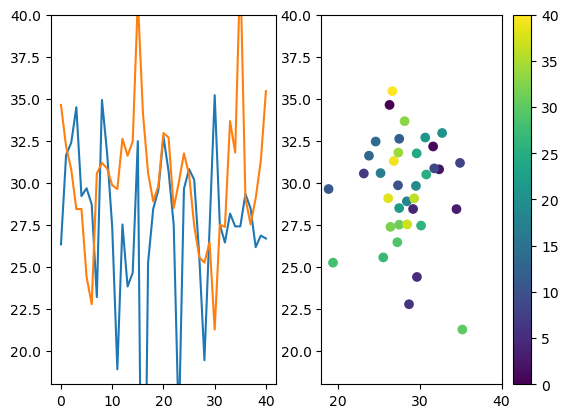

In [61]:
pl.subplot(1,2,1)
pl.plot(tb2['x_mean'])
pl.plot(tb2['y_mean'])
pl.ylim(18, 40);
pl.subplot(1,2,2)
pl.scatter(tb2['x_mean'], tb2['y_mean'], c=np.arange(len(tb2)))
pl.colorbar()
pl.axis([18,40,18,40]);

# Fit positions of moment maps

In [62]:
centroid_measurements = []

## SO first

In [63]:
so_scube = scubes[-2].with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value=99.29987*u.GHz).spectral_slab(-300*u.km/u.s, 300*u.km/u.s)
so_scube

DaskSpectralCube with shape=(408, 58, 58) and unit=Jy / beam and chunk size (60, 33, 58):
 n_x:     58  type_x: RA---SIN  unit_x: deg    range:   266.488258 deg:  266.492963 deg
 n_y:     58  type_y: DEC--SIN  unit_y: deg    range:   -28.955072 deg:  -28.950956 deg
 n_s:    408  type_s: VRAD      unit_s: km / s  range:     -300.055 km / s:     299.963 km / s

### Moment images

In [64]:
background_stddev_so = so_scube.subcube_from_regions([annulus]).std(axis=(1,2))
background_mean_so = so_scube.subcube_from_regions([annulus]).mean(axis=(1,2))
mean_so_spec = so_scube.subcube_from_regions([circle]).mean(axis=(1,2))

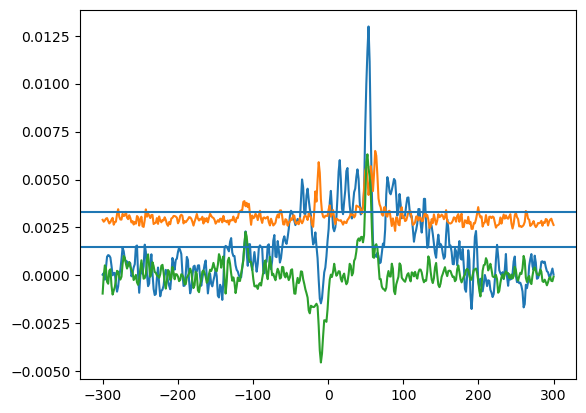

In [65]:
pl.plot(mean_so_spec.spectral_axis, mean_so_spec.value)
pl.plot(mean_so_spec.spectral_axis, background_stddev_so.value)
pl.plot(mean_so_spec.spectral_axis, background_mean_so.value)
pl.axhline(0.0033)
pl.axhline(0.0015)

Model: Gaussian2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Parameters:
        amplitude            x_mean             y_mean           x_stddev           y_stddev            theta       
    ------------------ ------------------ ----------------- ------------------ ------------------ ------------------
    148.32008973612423 28.675184605802404 28.82932587561258 2.5294143922434666 2.9667869508805436 2.0085460104975636


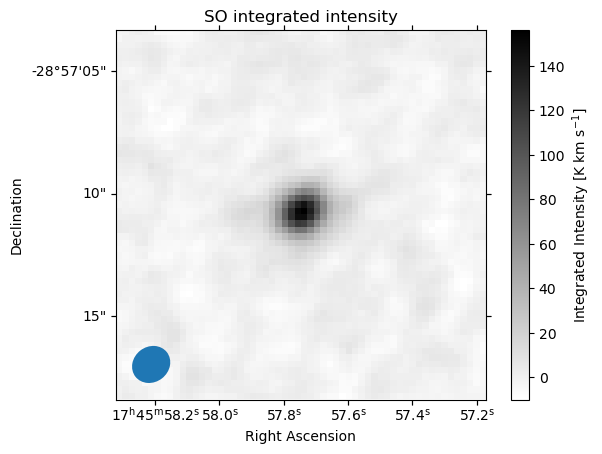

In [256]:
contest = so_scube.median(axis=0)
m0 = ((so_scube-contest).with_mask((background_stddev_so < 0.0033*background_stddev_so.unit)[:,None,None])
              .with_mask((mean_so_spec > 0.0015*mean_so_spec.unit)[:,None,None])).to(u.K).moment0()
m0_so_ptsrc = m0

jtok = m0.beam.jtok(so_scube.with_spectral_unit(u.GHz).spectral_axis[0]).value

fig = pl.figure()
ax = pl.subplot(projection=m0.wcs)
im = ax.imshow(m0.value, cmap='gray_r')
cb = pl.colorbar(mappable=im)
cb.set_label("Integrated Intensity [K km s$^{-1}$]")
pixscale = m0.wcs.celestial.proj_plane_pixel_area()**0.5
ellipse_artist = m0.beam.ellipse_to_plot(5, 5, pixscale)
ax.add_artist(ellipse_artist)  
ax.set_xlabel("Right Ascension")
ax.set_ylabel("Declination")
ax.set_title("SO integrated intensity")
fig.savefig('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/SO32_m0.pdf', bbox_inches='tight')

g_init = Gaussian2D(amplitude=0.06, x_mean=29, y_mean=29, x_stddev=3., y_stddev=3)
fit_g = LevMarLSQFitter()
y, x = np.mgrid[:so_scube.shape[1], :so_scube.shape[2]]
stddev = stats.mad_std(m0.value)
g = fit_g(g_init, x, y, z=m0.value, weights=1/stddev)
print(g)
cen = m0.wcs.pixel_to_world(g.x_mean, g.y_mean)

if g.x_stddev >= g.y_stddev:
    src = radio_beam.Beam(major=g.x_stddev*pixscale*2.35, minor=g.y_stddev*pixscale*2.35, pa=90*u.deg+g.theta*u.rad)
else:
    src = radio_beam.Beam(major=g.y_stddev*pixscale*2.35, minor=g.x_stddev*pixscale*2.35, pa=90*u.deg+g.theta*u.rad)
try:
    deconv_size = src.deconvolve(m0.beam)
    
    centroid_measurements.append(['SO 3(2)-2(1)', 'm0', g.amplitude.value, g.amplitude.value/jtok, cen.ra, cen.dec, g.x_stddev*pixscale, g.y_stddev*pixscale, 90*u.deg + (g.theta*u.rad).to(u.deg),
                                  deconv_size.major, deconv_size.minor, deconv_size.pa
                                 ])
except radio_beam.utils.BeamError:
    centroid_measurements.append(['SO 3(2)-2(1)', 'm0', g.amplitude.value, g.amplitude.value/jtok, cen.ra, cen.dec, g.x_stddev*pixscale, g.y_stddev*pixscale, 90*u.deg + (g.theta*u.rad).to(u.deg),
                                  np.nan*u.arcsec, np.nan*u.arcsec, np.nan*u.deg
                                 ])

m0.write('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/SO32_m0.fits', overwrite=True)

#### SO fullcloud background

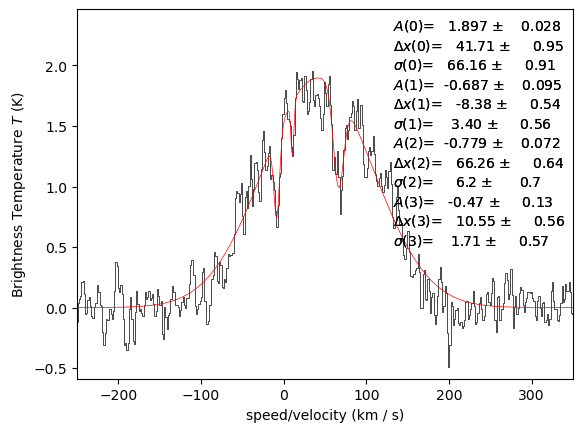

In [259]:
spw33.xarr.convert_to_unit(u.GHz)
spw33.xarr.convert_to_unit(u.km/u.s, velocity_convention='radio', refX=nurest_so32)
spw33.plotter(xmin=-250, xmax=350)
spw33.specfit(guesses=[1, 50, 70, -1, -10, 8, -1, 65, 4, -0.3, 10, 5])

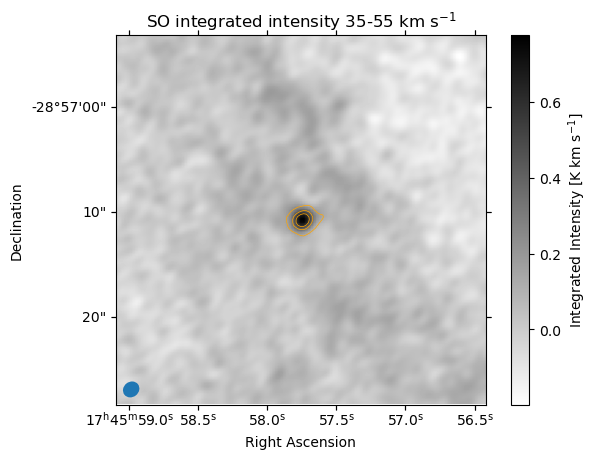

In [276]:
m0_bigcloud_3555_so = (cubes[-2]
                    .subcube_from_regions([bigregion])
                    .with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value=nurest_so32)
                    .spectral_slab(35*u.km/u.s, 55*u.km/u.s)
                   ).moment0()

fig = pl.figure()
ax = pl.subplot(projection=m0_bigcloud_3555_so.wcs)
im = ax.imshow(m0_bigcloud_3555_so.value, cmap='gray_r')
cb = pl.colorbar(mappable=im)
cb.set_label("Integrated Intensity [K km s$^{-1}$]")
pixscale = m0.wcs.celestial.proj_plane_pixel_area()**0.5
ellipse_artist = m0.beam.ellipse_to_plot(5, 5, pixscale)
ax.add_artist(ellipse_artist)  
ax.set_xlabel("Right Ascension")
ax.set_ylabel("Declination")
ax.set_title("SO integrated intensity 35-55 km s$^{-1}$")

ax.contour(m0_so_ptsrc.value, levels=[20,60,100], colors=['orange']*3, linewidths=[0.5]*3, transform=ax.get_transform(m0_so_ptsrc.wcs));
fig.savefig('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/SO32_big_m0_35to55kms_with_comsrc.pdf', bbox_inches='tight')

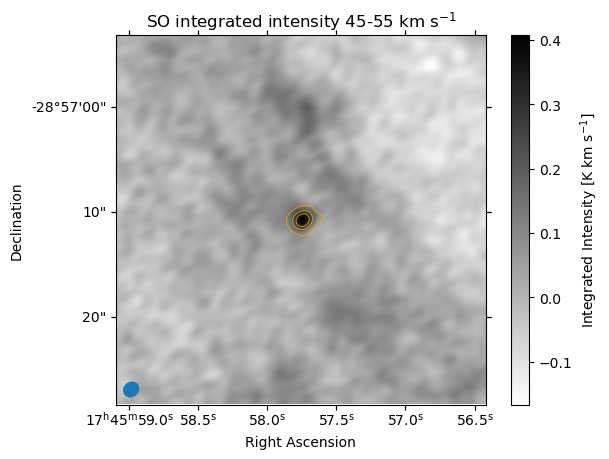

In [277]:
m0_bigcloud_4555_so = (cubes[-2]
                    .subcube_from_regions([bigregion])
                    .with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value=nurest_so32)
                    .spectral_slab(45*u.km/u.s, 55*u.km/u.s)
                   ).moment0()

fig = pl.figure()
ax = pl.subplot(projection=m0_bigcloud_4555_so.wcs)
im = ax.imshow(m0_bigcloud_4555_so.value, cmap='gray_r')
cb = pl.colorbar(mappable=im)
cb.set_label("Integrated Intensity [K km s$^{-1}$]")
pixscale = m0.wcs.celestial.proj_plane_pixel_area()**0.5
ellipse_artist = m0.beam.ellipse_to_plot(5, 5, pixscale)
ax.add_artist(ellipse_artist)  
ax.set_xlabel("Right Ascension")
ax.set_ylabel("Declination")
ax.set_title("SO integrated intensity 45-55 km s$^{-1}$")

ax.contour(m0_so_ptsrc.value, levels=[20,60,100], colors=['orange']*3, linewidths=[0.5]*3, transform=ax.get_transform(m0_so_ptsrc.wcs));
fig.savefig('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/SO32_big_m0_45to55kms_with_comsrc.pdf', bbox_inches='tight')

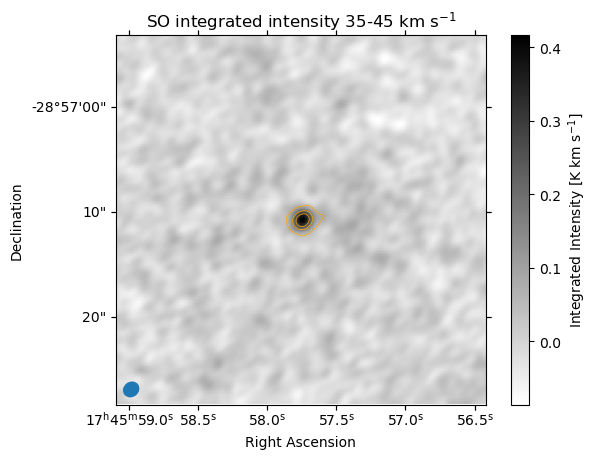

In [278]:
m0_bigcloud_3445_so = (cubes[-2]
                    .subcube_from_regions([bigregion])
                    .with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value=nurest_so32)
                    .spectral_slab(35*u.km/u.s, 45*u.km/u.s)
                   ).moment0()

fig = pl.figure()
ax = pl.subplot(projection=m0_bigcloud_3445_so.wcs)
im = ax.imshow(m0_bigcloud_3445_so.value, cmap='gray_r')
cb = pl.colorbar(mappable=im)
cb.set_label("Integrated Intensity [K km s$^{-1}$]")
pixscale = m0.wcs.celestial.proj_plane_pixel_area()**0.5
ellipse_artist = m0.beam.ellipse_to_plot(5, 5, pixscale)
ax.add_artist(ellipse_artist)  
ax.set_xlabel("Right Ascension")
ax.set_ylabel("Declination")
ax.set_title("SO integrated intensity 35-45 km s$^{-1}$")

ax.contour(m0_so_ptsrc.value, levels=[20,60,100], colors=['orange']*3, linewidths=[0.5]*3, transform=ax.get_transform(m0_so_ptsrc.wcs));
fig.savefig('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/SO32_big_m0_35to45kms_with_comsrc.pdf', bbox_inches='tight')

#### H13COP

Not a clear detection

In [184]:
scubes[1], nurest_h13cop

(DaskSpectralCube with shape=(956, 58, 58) and unit=Jy / beam and chunk size (22, 58, 58):
  n_x:     58  type_x: RA---SIN  unit_x: deg    range:   266.488258 deg:  266.492963 deg
  n_y:     58  type_y: DEC--SIN  unit_y: deg    range:   -28.955072 deg:  -28.950956 deg
  n_s:    956  type_s: FREQ      unit_s: Hz     range: 86666488077.200 Hz:87132826992.200 Hz,
 <Quantity 86.7543 GHz>)

In [189]:
h13cop_scube = scubes[1].with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value=nurest_h13cop).spectral_slab(-350*u.km/u.s, 350*u.km/u.s)
contest_h13cop = scubes[1].median(axis=0)

background_stddev_h13cop = h13cop_scube.subcube_from_regions([annulus]).std(axis=(1,2))
background_mean_h13cop = h13cop_scube.subcube_from_regions([annulus]).mean(axis=(1,2))
mean_h13cop_spec = h13cop_scube.subcube_from_regions([circle]).mean(axis=(1,2))

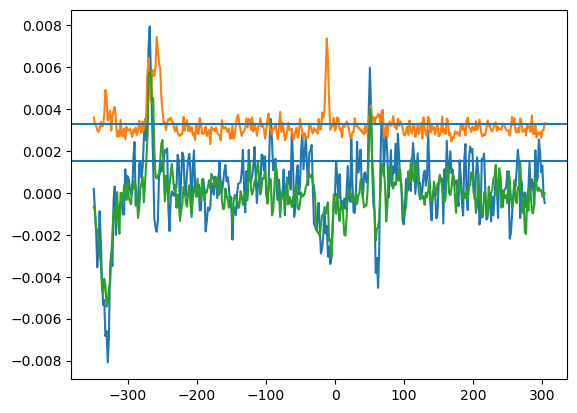

In [190]:
pl.plot(mean_h13cop_spec.spectral_axis, mean_h13cop_spec.value)
pl.plot(mean_h13cop_spec.spectral_axis, background_stddev_h13cop.value)
pl.plot(mean_h13cop_spec.spectral_axis, background_mean_h13cop.value)
pl.axhline(0.0033)
pl.axhline(0.0015)

Model: Gaussian2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Parameters:
        amplitude           x_mean             y_mean            x_stddev          y_stddev           theta       
    ----------------- ------------------ ------------------ ----------------- ----------------- ------------------
    12.23002159398392 27.609989523601126 29.847964504491703 7.206119014930517 8.129650590986492 0.9895282199076768


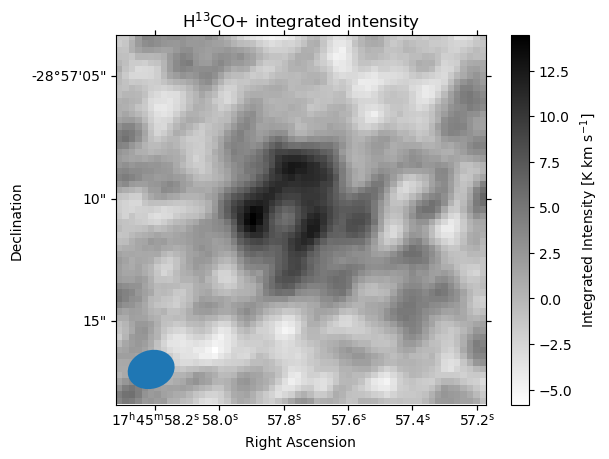

In [205]:
m0 = ((h13cop_scube-contest_h13cop)
      .with_mask((background_stddev_h13cop < 0.0033*background_stddev_h13cop.unit)[:,None,None])
      .with_mask((mean_h13cop_spec > 0.0015*mean_h13cop_spec.unit)[:,None,None])
      .spectral_slab(-250*u.km/u.s, 250*u.km/u.s)
     ).to(u.K).moment0()

jtok = m0.beam.jtok(h13cop_scube.with_spectral_unit(u.GHz).spectral_axis[0]).value

fig = pl.figure()
ax = pl.subplot(projection=m0.wcs)
im = ax.imshow(m0.value, cmap='gray_r')
cb = pl.colorbar(mappable=im)
cb.set_label("Integrated Intensity [K km s$^{-1}$]")
pixscale = m0.wcs.celestial.proj_plane_pixel_area()**0.5
ellipse_artist = m0.beam.ellipse_to_plot(5, 5, pixscale)
ax.add_artist(ellipse_artist)  
ax.set_xlabel("Right Ascension")
ax.set_ylabel("Declination")
ax.set_title("H$^{13}$CO+ integrated intensity")
fig.savefig('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/H13COP10_m0.pdf', bbox_inches='tight')

g_init = Gaussian2D(amplitude=0.06, x_mean=29, y_mean=29, x_stddev=3., y_stddev=3)
fit_g = LevMarLSQFitter()
y, x = np.mgrid[:h13cop_scube.shape[1], :h13cop_scube.shape[2]]
stddev = stats.mad_std(m0.value)
g = fit_g(g_init, x, y, z=m0.value, weights=1/stddev)
print(g)
cen = m0.wcs.pixel_to_world(g.x_mean, g.y_mean)

if g.x_stddev >= g.y_stddev:
    src = radio_beam.Beam(major=g.x_stddev*pixscale*2.35, minor=g.y_stddev*pixscale*2.35, pa=90*u.deg+g.theta*u.rad)
else:
    src = radio_beam.Beam(major=g.y_stddev*pixscale*2.35, minor=g.x_stddev*pixscale*2.35, pa=90*u.deg+g.theta*u.rad)
#try:
#    deconv_size = src.deconvolve(m0.beam)
#    
#    centroid_measurements.append(['H13CO+', 'm0', g.amplitude.value, g.amplitude.value/jtok, cen.ra, cen.dec, g.x_stddev*pixscale, g.y_stddev*pixscale, 90*u.deg + (g.theta*u.rad).to(u.deg),
#                                  deconv_size.major, deconv_size.minor, deconv_size.pa
#                                 ])
#except radio_beam.utils.BeamError:
#    centroid_measurements.append(['H13CO+', 'm0', g.amplitude.value, g.amplitude.value/jtok, cen.ra, cen.dec, g.x_stddev*pixscale, g.y_stddev*pixscale, 90*u.deg + (g.theta*u.rad).to(u.deg),
#                                  np.nan*u.arcsec, np.nan*u.arcsec, np.nan*u.arcsec, 
#                                 ])


m0.write('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/H13COP10_m0.fits', overwrite=True)

#### H13COP: Tsuboi's data

In [ ]:
fns_2012 = glob.glob("/orange/adamginsburg/ACES/ancillary/data/2012.1.00080.S/science_goal.uid___A002_X6444ba_Xc/group.uid___A002_X6444ba_Xd/member.uid___A002_X6444ba_Xe/calibrated/workdir/*.image.pbcor.fits")
scubes2012 = [SpectralCube.read(fn, format='fits').subcube_from_regions([region]) for fn in fns_2012]

In [218]:
scubes2012[0].mask_out_bad_beams(threshold=0.1).beams.common_beam()

Beam: BMAJ=3.0050093062297463 arcsec BMIN=1.9130883344001504 arcsec BPA=91.3657034057514 deg

In [199]:
sc = scubes2012[0].mask_out_bad_beams(threshold=0.1)
h13cop2012_scube = sc.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value=nurest_h13cop).spectral_slab(-350*u.km/u.s, 350*u.km/u.s)
contest_h13cop2012 = sc.median(axis=0)

background_stddev_h13cop2012 = h13cop2012_scube.subcube_from_regions([annulus]).std(axis=(1,2))
background_mean_h13cop2012 = h13cop2012_scube.subcube_from_regions([annulus]).mean(axis=(1,2))
mean_h13cop2012_spec = h13cop2012_scube.subcube_from_regions([circle]).mean(axis=(1,2))

Do not use the average beam for convolution! Use the smallest common beam from `Beams.common_beam()`.


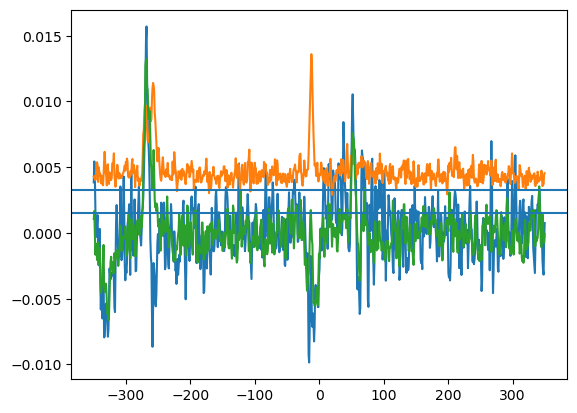

In [200]:
pl.plot(mean_h13cop2012_spec.spectral_axis, mean_h13cop2012_spec.value)
pl.plot(mean_h13cop2012_spec.spectral_axis, background_stddev_h13cop2012.value)
pl.plot(mean_h13cop2012_spec.spectral_axis, background_mean_h13cop2012.value)
pl.axhline(0.0033)
pl.axhline(0.0015)

Do not use the average beam for convolution! Use the smallest common beam from `Beams.common_beam()`.


Model: Gaussian2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Parameters:
         amplitude            x_mean             y_mean            x_stddev          y_stddev             theta       
    ------------------- ------------------ ------------------ ----------------- ------------------ -------------------
    0.36419285250456024 30.134332798921932 24.546232580170038 3.435195127930547 12.184678210133958 -0.5077098837579497


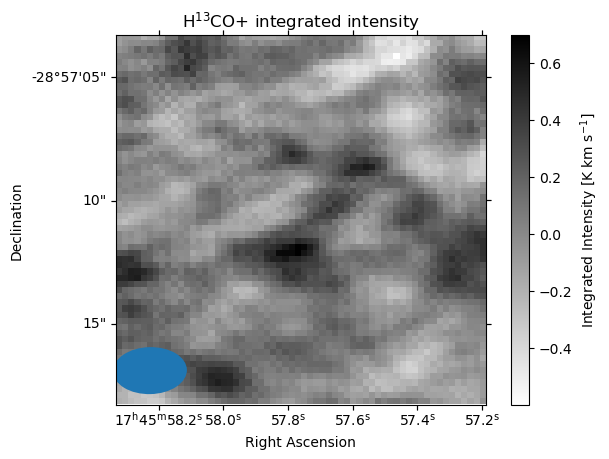

In [204]:
m0 = ((h13cop2012_scube-contest_h13cop2012)
      .with_mask((background_stddev_h13cop2012 < 0.0033*background_stddev_h13cop2012.unit)[:,None,None])
      .with_mask((mean_h13cop2012_spec > 0.0015*mean_h13cop2012_spec.unit)[:,None,None])
      .spectral_slab(-250*u.km/u.s, 250*u.km/u.s)
     ).to(u.K).moment0()

jtok = m0.beam.jtok(h13cop2012_scube.with_spectral_unit(u.GHz).spectral_axis[0]).value

fig = pl.figure()
ax = pl.subplot(projection=m0.wcs)
im = ax.imshow(m0.value, cmap='gray_r')
cb = pl.colorbar(mappable=im)
cb.set_label("Integrated Intensity [K km s$^{-1}$]")
pixscale = m0.wcs.celestial.proj_plane_pixel_area()**0.5
ellipse_artist = m0.beam.ellipse_to_plot(5, 5, pixscale)
ax.add_artist(ellipse_artist)  
ax.set_xlabel("Right Ascension")
ax.set_ylabel("Declination")
ax.set_title("H$^{13}$CO+ integrated intensity")
fig.savefig('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/H13COP10_2012_m0.pdf', bbox_inches='tight')

g_init = Gaussian2D(amplitude=0.06, x_mean=29, y_mean=29, x_stddev=3., y_stddev=3)
fit_g = LevMarLSQFitter()
y, x = np.mgrid[:h13cop2012_scube.shape[1], :h13cop2012_scube.shape[2]]
stddev = stats.mad_std(m0.value)
g = fit_g(g_init, x, y, z=m0.value, weights=1/stddev)
print(g)
cen = m0.wcs.pixel_to_world(g.x_mean, g.y_mean)

if g.x_stddev >= g.y_stddev:
    src = radio_beam.Beam(major=g.x_stddev*pixscale*2.35, minor=g.y_stddev*pixscale*2.35, pa=90*u.deg+g.theta*u.rad)
else:
    src = radio_beam.Beam(major=g.y_stddev*pixscale*2.35, minor=g.x_stddev*pixscale*2.35, pa=90*u.deg+g.theta*u.rad)

# try:
#     deconv_size = src.deconvolve(m0.beam)
#     
#     centroid_measurements.append(['H13CO+2012', 'm0', g.amplitude.value, g.amplitude.value/jtok, cen.ra, cen.dec, g.x_stddev*pixscale, g.y_stddev*pixscale, 90*u.deg + (g.theta*u.rad).to(u.deg),
#                                   deconv_size.major, deconv_size.minor, deconv_size.pa
#                                  ])
# except radio_beam.utils.BeamError:
#     centroid_measurements.append(['H13CO+2012', 'm0', g.amplitude.value, g.amplitude.value/jtok, cen.ra, cen.dec, g.x_stddev*pixscale, g.y_stddev*pixscale, 90*u.deg + (g.theta*u.rad).to(u.deg),
#                                   np.nan*u.arcsec, np.nan*u.arcsec, np.nan*u.arcsec, 
#                                  ])


m0.write('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/H13COP10_2012_m0.fits', overwrite=True)

## Now CS moments

In [67]:
cs_scube = (scubes[-2]
            .with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value=nurest_cs21)
            .spectral_slab(-300*u.km/u.s, 300*u.km/u.s))
cs_scube

DaskSpectralCube with shape=(402, 58, 58) and unit=Jy / beam and chunk size (60, 33, 58):
 n_x:     58  type_x: RA---SIN  unit_x: deg    range:   266.488258 deg:  266.492963 deg
 n_y:     58  type_y: DEC--SIN  unit_y: deg    range:   -28.955072 deg:  -28.950956 deg
 n_s:    402  type_s: VRAD      unit_s: km / s  range:     -299.573 km / s:     299.557 km / s

In [68]:
background_stddev_cs = cs_scube.subcube_from_regions([annulus]).std(axis=(1,2))
background_mean_cs = cs_scube.subcube_from_regions([annulus]).mean(axis=(1,2))
mean_cs_spec = cs_scube.subcube_from_regions([circle]).mean(axis=(1,2))

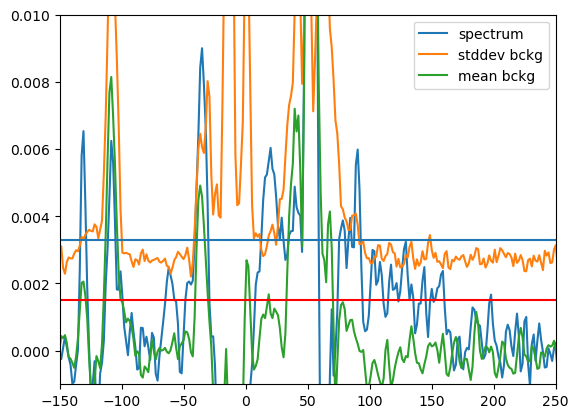

In [69]:
pl.plot(mean_cs_spec.spectral_axis, mean_cs_spec.value, label='spectrum')
pl.plot(mean_cs_spec.spectral_axis, background_stddev_cs.value, label='stddev bckg')
pl.plot(mean_cs_spec.spectral_axis, background_mean_cs.value, label='mean bckg')
pl.axhline(0.0033)
pl.axhline(0.0015, color='r')
pl.ylim(-0.001, 0.01)
pl.xlim(-150, 250)
pl.legend(loc='best');

Model: Gaussian2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Parameters:
        amplitude            x_mean             y_mean            x_stddev         y_stddev            theta        
    ------------------ ------------------ ------------------ ----------------- ---------------- --------------------
    55.650578910083006 28.247627874657322 28.788487892112837 4.172805827895565 3.14902909536739 -0.06905730437108455


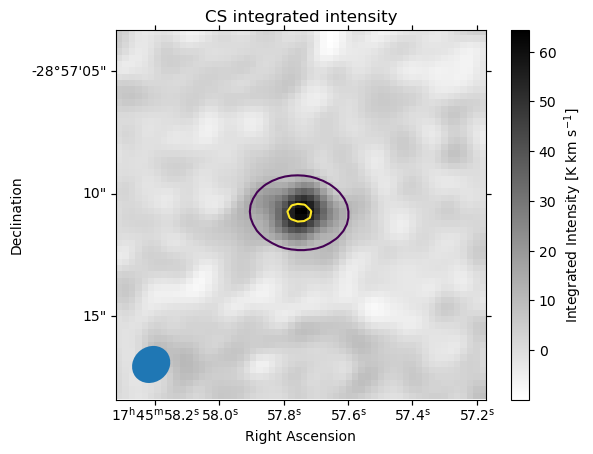

In [245]:
m0 = (cs_scube.with_mask((background_stddev_cs < 0.0033*background_stddev_cs.unit)[:,None,None])
              .with_mask((mean_cs_spec > 0.0010*mean_cs_spec.unit)[:,None,None])
              .spectral_slab(-150*u.km/u.s, 250*u.km/u.s)
     ).to(u.K).moment0()
m0_cs_ptsrc = m0
jtok = m0.beam.jtok(cs_scube.with_spectral_unit(u.GHz).spectral_axis[0]).value

fig = pl.figure()
ax = pl.subplot(projection=m0.wcs)
im = ax.imshow(m0.value, cmap='gray_r')
cb = pl.colorbar(mappable=im)
cb.set_label("Integrated Intensity [K km s$^{-1}$]")
pixscale = m0.wcs.celestial.proj_plane_pixel_area()**0.5
ellipse_artist = m0.beam.ellipse_to_plot(5, 5, pixscale)
ax.add_artist(ellipse_artist)  
ax.set_xlabel("Right Ascension")
ax.set_ylabel("Declination")
ax.set_title("CS integrated intensity")
fig.savefig('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/CS21_m0.pdf', bbox_inches='tight')


g_init = Gaussian2D(amplitude=11, x_mean=m0.shape[1]/2., y_mean=m0.shape[0]/2., x_stddev=3., y_stddev=3)
fit_g = LevMarLSQFitter()
y, x = np.mgrid[:cs_scube.shape[1], :cs_scube.shape[2]]
stddev = stats.mad_std(m0.value)
g = fit_g(g_init, x, y, z=m0.value, weights=1/stddev)
print(g)
cen = m0.wcs.pixel_to_world(g.x_mean, g.y_mean)

src = radio_beam.Beam(major=g.x_stddev*pixscale*2.35, minor=g.y_stddev*pixscale*2.35, pa=90*u.deg+g.theta*u.rad)
deconv_size = src.deconvolve(m0.beam)

centroid_measurements.append(['CS 2-1', 'm0', g.amplitude.value, g.amplitude.value/jtok, cen.ra, cen.dec, g.x_stddev*pixscale, g.y_stddev*pixscale, 90*u.deg + (g.theta*u.rad).to(u.deg),
                              deconv_size.major, deconv_size.minor, deconv_size.pa
                             ])


m0.write('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/CS21_m0.fits', overwrite=True)

ax.contour(g(x,y), levels=[10, 50])

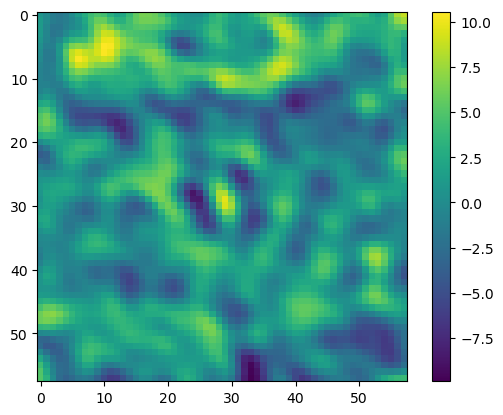

In [71]:
pl.imshow(m0.value - g(x,y))
pl.colorbar();

In [236]:
nurest_cs21

<Quantity 9.798095e+10 Hz>

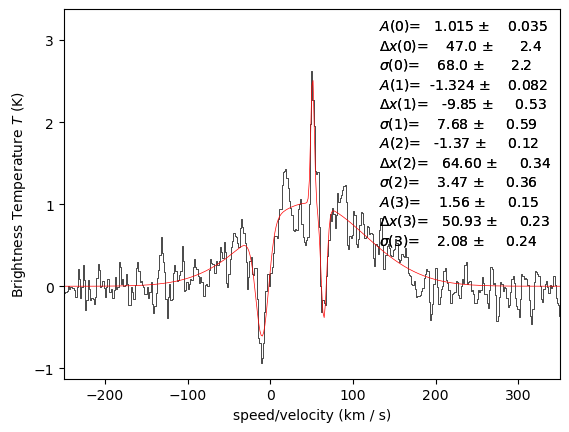

In [240]:
spw33.xarr.convert_to_unit(u.GHz)
spw33.xarr.convert_to_unit(u.km/u.s, velocity_convention='radio', refX=nurest_cs21)
spw33.plotter(xmin=-250, xmax=350)
spw33.specfit(guesses=[1, 50, 70, -1, -10, 8, -1, 65, 4, 1, 55, 4])

### CS cloud overlay

In [242]:
m0_cloud_4060 = cs_scube.spectral_slab(40*u.km/u.s, 60*u.km/u.s).moment0()
m0_cloud_4555 = cs_scube.spectral_slab(45*u.km/u.s, 55*u.km/u.s).moment0()

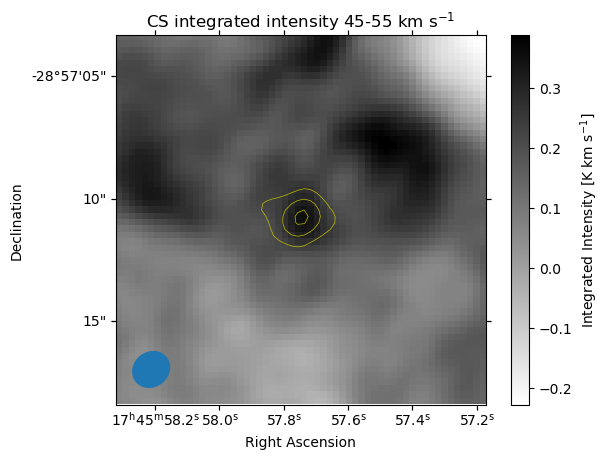

In [268]:

fig = pl.figure()
ax = pl.subplot(projection=m0_cloud_4555.wcs)
im = ax.imshow(m0_cloud_4555.value, cmap='gray_r')
cb = pl.colorbar(mappable=im)
cb.set_label("Integrated Intensity [K km s$^{-1}$]")
pixscale = m0.wcs.celestial.proj_plane_pixel_area()**0.5
ellipse_artist = m0.beam.ellipse_to_plot(5, 5, pixscale)
ax.add_artist(ellipse_artist)  
ax.set_xlabel("Right Ascension")
ax.set_ylabel("Declination")
ax.set_title("CS integrated intensity 45-55 km s$^{-1}$")
ax.contour(m0_cs_ptsrc.value, levels=[20,40,60], colors=['y']*3, linewidths=[0.5]*3, transform=ax.get_transform(m0_cs_ptsrc.wcs));
fig.savefig('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/CS21_m0_45to55kms_with_comsrc.pdf', bbox_inches='tight')

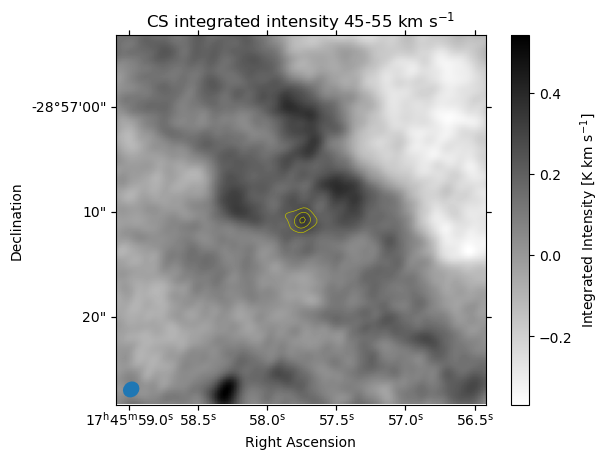

In [269]:
m0_bigcloud_4555 = (cubes[-2]
                    .subcube_from_regions([bigregion])
                    .with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value=nurest_cs21)
                    .spectral_slab(45*u.km/u.s, 55*u.km/u.s)
                   ).moment0()

fig = pl.figure()
ax = pl.subplot(projection=m0_bigcloud_4555.wcs)
im = ax.imshow(m0_bigcloud_4555.value, cmap='gray_r')
cb = pl.colorbar(mappable=im)
cb.set_label("Integrated Intensity [K km s$^{-1}$]")
pixscale = m0.wcs.celestial.proj_plane_pixel_area()**0.5
ellipse_artist = m0.beam.ellipse_to_plot(5, 5, pixscale)
ax.add_artist(ellipse_artist)  
ax.set_xlabel("Right Ascension")
ax.set_ylabel("Declination")
ax.set_title("CS integrated intensity 45-55 km s$^{-1}$")

ax.contour(m0_cs_ptsrc.value, levels=[20,40,60], colors=['y']*3, linewidths=[0.5]*3, transform=ax.get_transform(m0_cs_ptsrc.wcs));
fig.savefig('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/CS21_big_m0_45to55kms_with_comsrc.pdf', bbox_inches='tight')

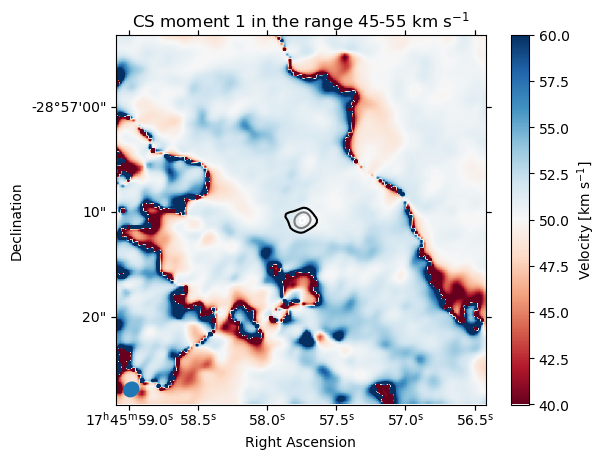

In [255]:
m1_bigcloud_4060 = (cubes[-2]
.subcube_from_regions([bigregion])
.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value=nurest_cs21)
.spectral_slab(45*u.km/u.s, 55*u.km/u.s)
).moment1()
fig = pl.figure()
ax = pl.subplot(projection=m1_bigcloud_4060.wcs)
im = ax.imshow(m1_bigcloud_4060.value, cmap='RdBu', vmin=40, vmax=60)
cb = pl.colorbar(mappable=im)
cb.set_label("Velocity [km s$^{-1}$]")
pixscale = m0.wcs.celestial.proj_plane_pixel_area()**0.5
ellipse_artist = m0.beam.ellipse_to_plot(5, 5, pixscale)
ax.add_artist(ellipse_artist)  
ax.set_xlabel("Right Ascension")
ax.set_ylabel("Declination")
ax.set_title("CS moment 1 in the range 45-55 km s$^{-1}$");

ax.contour(m0_cs_ptsrc.value, levels=[20,40,60], cmap='gray', transform=ax.get_transform(m0_cs_ptsrc.wcs));

### C34S Tsuboi

Not a clear detection

In [209]:
sc = scubes2012[1].mask_out_bad_beams(threshold=0.1)
c34s2012_scube = sc.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value=nurest_c34s21).spectral_slab(-350*u.km/u.s, 350*u.km/u.s)
contest_c34s2012 = sc.median(axis=0)

background_stddev_c34s2012 = c34s2012_scube.subcube_from_regions([annulus]).std(axis=(1,2))
background_mean_c34s2012 = c34s2012_scube.subcube_from_regions([annulus]).mean(axis=(1,2))
mean_c34s2012_spec = c34s2012_scube.subcube_from_regions([circle]).mean(axis=(1,2))

Do not use the average beam for convolution! Use the smallest common beam from `Beams.common_beam()`.


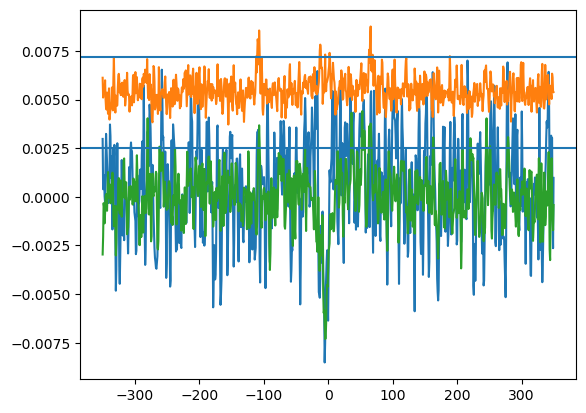

In [213]:
pl.plot(mean_c34s2012_spec.spectral_axis, mean_c34s2012_spec.value)
pl.plot(mean_c34s2012_spec.spectral_axis, background_stddev_c34s2012.value)
pl.plot(mean_c34s2012_spec.spectral_axis, background_mean_c34s2012.value)
pl.axhline(0.0072)
pl.axhline(0.0025)

Do not use the average beam for convolution! Use the smallest common beam from `Beams.common_beam()`.


Model: Gaussian2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Parameters:
        amplitude            x_mean             y_mean           x_stddev          y_stddev            theta       
    ------------------ ------------------ ------------------ ---------------- ----------------- -------------------
    16.351381578538554 30.862048682490837 31.256264164406588 9.65257656646273 8.515014410579212 0.19177924249669315


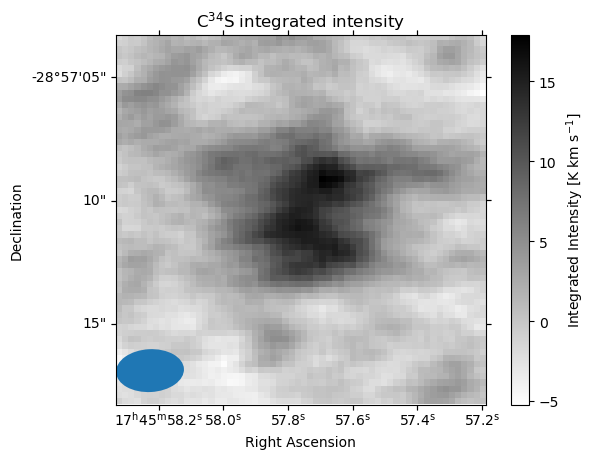

In [215]:
m0 = ((c34s2012_scube-contest_c34s2012)
      .with_mask((background_stddev_c34s2012 < 0.0072*background_stddev_c34s2012.unit)[:,None,None])
      .with_mask((mean_c34s2012_spec > 0.0025*mean_c34s2012_spec.unit)[:,None,None])
      .spectral_slab(-250*u.km/u.s, 250*u.km/u.s)
     ).to(u.K).moment0()

jtok = m0.beam.jtok(c34s2012_scube.with_spectral_unit(u.GHz).spectral_axis[0]).value

fig = pl.figure()
ax = pl.subplot(projection=m0.wcs)
im = ax.imshow(m0.value, cmap='gray_r')
cb = pl.colorbar(mappable=im)
cb.set_label("Integrated Intensity [K km s$^{-1}$]")
pixscale = m0.wcs.celestial.proj_plane_pixel_area()**0.5
ellipse_artist = m0.beam.ellipse_to_plot(5, 5, pixscale)
ax.add_artist(ellipse_artist)  
ax.set_xlabel("Right Ascension")
ax.set_ylabel("Declination")
ax.set_title("C$^{34}$S integrated intensity")
fig.savefig('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/c34s10_2012_m0.pdf', bbox_inches='tight')

g_init = Gaussian2D(amplitude=0.06, x_mean=29, y_mean=29, x_stddev=3., y_stddev=3)
fit_g = LevMarLSQFitter()
y, x = np.mgrid[:c34s2012_scube.shape[1], :c34s2012_scube.shape[2]]
stddev = stats.mad_std(m0.value)
g = fit_g(g_init, x, y, z=m0.value, weights=1/stddev)
print(g)
cen = m0.wcs.pixel_to_world(g.x_mean, g.y_mean)

if g.x_stddev >= g.y_stddev:
    src = radio_beam.Beam(major=g.x_stddev*pixscale*2.35, minor=g.y_stddev*pixscale*2.35, pa=90*u.deg+g.theta*u.rad)
else:
    src = radio_beam.Beam(major=g.y_stddev*pixscale*2.35, minor=g.x_stddev*pixscale*2.35, pa=90*u.deg+g.theta*u.rad)

# try:
#     deconv_size = src.deconvolve(m0.beam)
#     
#     centroid_measurements.append(['H13CO+2012', 'm0', g.amplitude.value, g.amplitude.value/jtok, cen.ra, cen.dec, g.x_stddev*pixscale, g.y_stddev*pixscale, 90*u.deg + (g.theta*u.rad).to(u.deg),
#                                   deconv_size.major, deconv_size.minor, deconv_size.pa
#                                  ])
# except radio_beam.utils.BeamError:
#     centroid_measurements.append(['H13CO+2012', 'm0', g.amplitude.value, g.amplitude.value/jtok, cen.ra, cen.dec, g.x_stddev*pixscale, g.y_stddev*pixscale, 90*u.deg + (g.theta*u.rad).to(u.deg),
#                                   np.nan*u.arcsec, np.nan*u.arcsec, np.nan*u.arcsec, 
#                                  ])


m0.write('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/c34s10_2012_m0.fits', overwrite=True)

## continuum

In [72]:
ls /orange/adamginsburg/ACES/data/2021.1.00172.L/science_goal.uid___A001_X1590_X30a8/group.uid___A001_X1590_X30a9/member.uid___A001_X15a0_X13c/calibrated/working/*spw33_35*cont*fits -d 

/orange/adamginsburg/ACES/data/2021.1.00172.L/science_goal.uid___A001_X1590_X30a8/group.uid___A001_X1590_X30a9/member.uid___A001_X15a0_X13c/calibrated/working/uid___A001_X15a0_X13c.s36_0.Sgr_A_star_sci.spw33_35.cont.I.iter1.image.tt0.pbcor.fits*


In [73]:
from astropy.io import fits
from astropy.wcs import WCS

In [74]:
fn = "/orange/adamginsburg/ACES/data/2021.1.00172.L/science_goal.uid___A001_X1590_X30a8/group.uid___A001_X1590_X30a9/member.uid___A001_X15a0_X13c/calibrated/working/uid___A001_X15a0_X13c.s36_0.Sgr_A_star_sci.spw33_35.cont.I.iter1.image.tt0.pbcor.fits"
fh = fits.open(fn)
contwcs = WCS(fh[0].header).celestial
preg = region.to_pixel(contwcs)
msk = preg.to_mask()
contim = msk.cutout(fh[0].data.squeeze());
beam = radio_beam.Beam.from_fits_header(fh[0].header)
jtok = beam.jtok(102*u.GHz).value
contim = contim * jtok

Model: Gaussian2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Parameters:
        amplitude            x_mean            y_mean           x_stddev          y_stddev             theta        
    ------------------ ------------------ ---------------- ----------------- ------------------ --------------------
    0.1035993267353875 29.103155173688595 29.0539155378385 2.825038328095847 2.4486689380830784 -0.08217934448721827


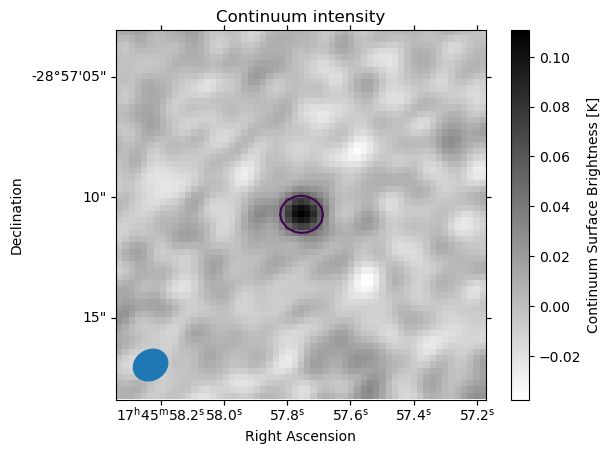

In [75]:
fig = pl.figure()
slcs,_ = msk.get_overlap_slices(fh[0].data.squeeze().shape)
contwcs_co = contwcs[slcs] 
ax = pl.subplot(projection=contwcs_co)
im = ax.imshow(contim, cmap='gray_r')
cb = pl.colorbar(mappable=im)
cb.set_label("Continuum Surface Brightness [K]")
pixscale = contwcs.celestial.proj_plane_pixel_area()**0.5
ellipse_artist = beam.ellipse_to_plot(5, 5, pixscale)
ax.add_artist(ellipse_artist)  
ax.set_xlabel("Right Ascension")
ax.set_ylabel("Declination")
ax.set_title("Continuum intensity")
fig.savefig('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/continuum.pdf', bbox_inches='tight')



g_init = Gaussian2D(amplitude=0.06, x_mean=29, y_mean=29, x_stddev=3., y_stddev=3)
fit_g = LevMarLSQFitter()
y, x = np.mgrid[:contim.shape[0], :contim.shape[1]]
stddev = stats.mad_std(contim)
g = fit_g(g_init, x, y, z=contim, weights=1/stddev)
print(g)
cen = contwcs_co.pixel_to_world(g.x_mean, g.y_mean)

src = radio_beam.Beam(major=g.x_stddev*pixscale*2.35, minor=g.y_stddev*pixscale*2.35, pa=90*u.deg+g.theta*u.rad)
deconv_size = src.deconvolve(beam)

centroid_measurements.append(['Continuum', 'spw33+35', g.amplitude.value, g.amplitude.value/jtok, cen.ra, cen.dec, g.x_stddev*pixscale, g.y_stddev*pixscale, 90*u.deg + (g.theta*u.rad).to(u.deg),
                              deconv_size.major, deconv_size.minor, deconv_size.pa
                             ])


header = fh[0].header
header.update(contwcs_co.to_header())
fits.PrimaryHDU(data=contim, header=header).writeto('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/cont_cutout.fits', overwrite=True)

ax.contour(g(x,y), levels=[0.05])

### B7 cont

In [76]:
b7cont = SpectralCube.read('/orange/adamginsburg/ACES/ancillary/data/2017.1.01185.S/science_goal.uid___A001_X12a3_Xe7/group.uid___A001_X12a3_Xe8/member.uid___A001_X12a3_Xe9/calibrated/50_kms_cloud_sci.spw0_1_2_3_4_5_6_7_8_9_10_11_12_13_14_15.mfs.I.manual.image.pbcor.fits')

In [77]:
b7cont.spectral_axis

<Quantity [3.50113125e+11] Hz>

Model: Gaussian2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Parameters:
         amplitude           x_mean            y_mean            x_stddev           y_stddev             theta        
    ------------------- ---------------- ------------------ ------------------ ----------------- ---------------------
    0.08962154543570341 14.0249762541769 15.858071912894735 2.6576907279407394 2.026349586092263 -0.029603097676466444
Deconvolution failed: Beam could not be deconvolved


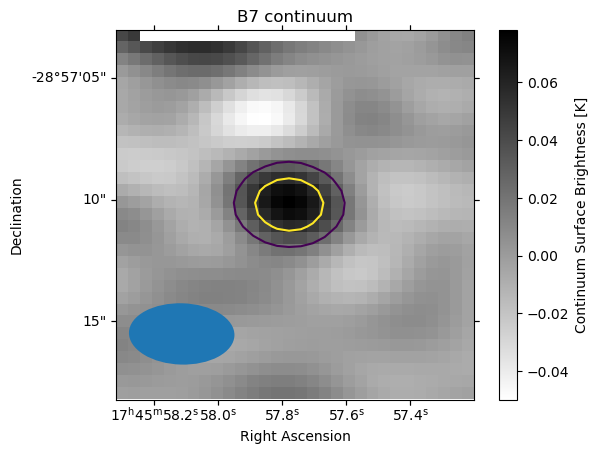

In [78]:
m0 = b7cont.subcube_from_regions([region]).to(u.K)
m0 = m0[0]
jtok = b7cont.beam.jtok(b7cont.spectral_axis[0])

fig = pl.figure()
ax = pl.subplot(projection=m0.wcs.celestial)
im = ax.imshow(m0.value, cmap='gray_r')
cb = pl.colorbar(mappable=im)
cb.set_label("Continuum Surface Brightness [K]")
pixscale = m0.wcs.celestial.proj_plane_pixel_area()**0.5
ellipse_artist = m0.beam.ellipse_to_plot(5, 5, pixscale)
ax.add_artist(ellipse_artist)  
ax.set_xlabel("Right Ascension")
ax.set_ylabel("Declination")
ax.set_title("B7 continuum")
fig.savefig('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/B7_continuum.pdf', bbox_inches='tight')

g_init = Gaussian2D(amplitude=0.06, x_mean=m0.shape[1]/2, y_mean=m0.shape[0]/2, x_stddev=2.5, y_stddev=2.5)
fit_g = LevMarLSQFitter()
y, x = np.mgrid[:m0.shape[0], :m0.shape[1]]
stddev = stats.mad_std(m0.value[np.isfinite(m0.value)])
g = fit_g(g_init, x, y, z=np.nan_to_num(m0.value), weights=np.nan_to_num(1/stddev))
print(g)
cen = m0.wcs.pixel_to_world(g.x_mean, g.y_mean)

src = radio_beam.Beam(major=g.x_stddev*pixscale*2.35, minor=g.y_stddev*pixscale*2.35, pa=90*u.deg+g.theta*u.rad)
try:
    deconv_size = src.deconvolve(m0.beam)
    
    centroid_measurements.append(['Continuum', 'B7', g.amplitude.value, g.amplitude.value/jtok.value, cen.ra, cen.dec, g.x_stddev*pixscale, g.y_stddev*pixscale, 90*u.deg + (g.theta*u.rad).to(u.deg),
                                  deconv_size.major, deconv_size.minor, deconv_size.pa
                                 ])
except Exception as ex:
    print(f"Deconvolution failed: {ex}")
    centroid_measurements.append(['Continuum', 'B7', g.amplitude.value, g.amplitude.value/jtok.value, cen.ra, cen.dec, g.x_stddev*pixscale, g.y_stddev*pixscale, 90*u.deg + (g.theta*u.rad).to(u.deg),
                                  np.nan*u.deg, np.nan*u.deg, np.nan*u.deg
                                 ])

m0.write('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/B7_continuum.fits', overwrite=True)
ax.contour(g(x,y), levels=[0.02, 0.05])

### NIR cont

In [79]:
from astropy.visualization import simple_norm

In [80]:
slcs = msk.get_overlap_slices(fh[0].data.squeeze().shape)
slcs

((slice(1209, 1268, None), slice(698, 757, None)),
 (slice(0, 59, None), slice(0, 59, None)))

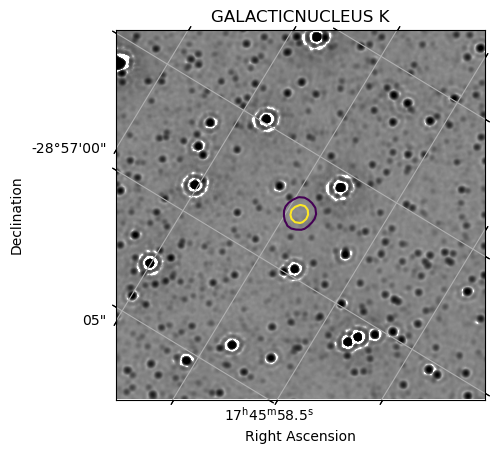

In [283]:
# Show continuum on NIR
fh = fits.open('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/Field6_chip3holo_2_cal.fits')
nirwcs = WCS(fh[0].header)
preg = region.to_pixel(nirwcs)
msk = preg.to_mask()
nirim = msk.cutout(fh[0].data.squeeze());
slcs,_ = msk.get_overlap_slices(fh[0].data.squeeze().shape)

fig = pl.figure()
ax = pl.subplot(projection=nirwcs[slcs])
#ax = pl.subplot(projection=contwcs_co)
im = ax.imshow(nirim, cmap='gray_r', norm=simple_norm(nirim, stretch='log', max_percent=99.5, min_percent=1),
               #transform=ax.get_transform(nirwcs[slcs]),
              )
ax.contour(contim, transform=ax.get_transform(contwcs_co),
           levels=[0.04,  0.08, ]);
ax.set_xlabel("Right Ascension")
ax.grid()
ax.set_ylabel("Declination")
ax.set_title("GALACTICNUCLEUS K")
fig.savefig('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/nir_continuum.pdf', bbox_inches='tight')

In [286]:
fh.info()

Filename: /orange/adamginsburg/cmz/hst_paschenalpha/hlsp_hpsgc_hst_nicmos-nic3_gc_f190n_v1_img.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      47   (23400, 9000)   float32   


In [284]:
# Show continuum on NIR HST
fh = fits.open('/orange/adamginsburg/cmz/hst_paschenalpha/hlsp_hpsgc_hst_nicmos-nic3_gc_f190n_v1_img.fits')
nirwcs = WCS(fh[0].header)
preg = region.to_pixel(nirwcs)
msk = preg.to_mask()
nirim = msk.cutout(fh[0].data.squeeze());
slcs,_ = msk.get_overlap_slices(fh[0].data.squeeze().shape)

fig = pl.figure()
ax = pl.subplot(projection=nirwcs[slcs])
#ax = pl.subplot(projection=contwcs_co)
im = ax.imshow(nirim, cmap='gray_r', norm=simple_norm(nirim, stretch='log', max_percent=99.5, min_percent=1),
               #transform=ax.get_transform(nirwcs[slcs]),
              )
ax.contour(contim, transform=ax.get_transform(contwcs_co),
           levels=[0.04,  0.08, ]);
ax.set_xlabel("Right Ascension")
ax.grid()
ax.set_ylabel("Declination")
ax.set_title("GALACTICNUCLEUS K")
fig.savefig('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/HSTF190nir_continuum.pdf', bbox_inches='tight')

InconsistentAxisTypesError: ERROR 4 in wcs_types() at line 3056 of file cextern/wcslib/C/wcs.c:
Unrecognized projection code (--T in CTYPE1).


### Make table

In [82]:
centrfittbl = Table((list(zip(*centroid_measurements))), names=['Image Data', 'Image Type', 'Amplitude', 'Amplitude [Jy]', 'RA', 'Dec', 'Major', 'Minor', 'PA',
                                                  'Deconv Major', 'Deconv Minor', 'Deconv PA'])
centrfittbl['Deconv Major'] = centrfittbl['Deconv Major'].to(u.arcsec)
centrfittbl['Deconv Minor'] = centrfittbl['Deconv Minor'].to(u.arcsec)
centrfittbl.write('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/centroid_fits.ecsv', overwrite=True)
centrfittbl.write('/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/centroid_fits.tex', overwrite=True)

In [83]:
centrfittbl

Image Data,Image Type,Amplitude,Amplitude [Jy],RA,Dec,Major,Minor,PA,Deconv Major,Deconv Minor,Deconv PA
,,,,deg,deg,deg,deg,deg,arcsec,arcsec,deg
str12,str8,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
SO 3(2)-2(1),m0,188.9390787323392,3.560529084386106,266.4905988225471,-28.952986663511535,0.0002313744437315075,0.00020079016362132835,106.75279613797865,1.1514749925030057,0.822148151526259,88.66736382297213
CS 2-1,m0,55.650578910083006,1.0210559520261366,266.4906315066001,-28.95299319702855,0.00030136930979244615,0.00022742987910985852,86.04330791498653,2.034868825952774,1.160367369846936,80.1959888332071
Continuum,spw33+35,0.1035993267353875,0.0017704635890274662,266.49064343001675,-28.95297402672501,0.00020403054591802718,0.00017684831219488362,85.2914703977307,0.9877780477540821,0.41636889953184314,60.07034163762825
Continuum,B7,0.08962154543570341,0.09821868120890748,266.4907408658049,-28.952833241989136,0.0003617412379696823,0.00027580869366253556,88.30386744262493,nan,nan,nan


#### Spectral Index

In [219]:
# wrong
# np.log(centrfittbl['Amplitude'][3] / centrfittbl['Amplitude'][2]) / np.log((350*u.GHz/(102*u.GHz)).decompose().value) + 2

In [85]:
np.log(centrfittbl['Amplitude [Jy]'][3] / centrfittbl['Amplitude [Jy]'][2]) / np.log((350*u.GHz/(102*u.GHz)).decompose().value)

3.2571647865885356

# model SO

In [86]:
from pyspeckit.spectrum.models import lte_molecule
from astroquery.linelists.cdms import CDMS
from astroquery.jplspec import JPLSpec
cdmstbl = CDMS.get_species_table()

In [87]:
cdmstbl[np.core.defchararray.find(cdmstbl['molecule'], 'SO') != -1]

tag,molecule,#lines,lg(Q(1000)),lg(Q(500)),lg(Q(300)),lg(Q(225)),lg(Q(150)),lg(Q(75)),lg(Q(37.5)),lg(Q(18.75)),lg(Q(9.375)),lg(Q(5.000)),lg(Q(2.725))
int64,str24,str9,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
48501,"SO, v=0",449,nan,nan,2.9295,2.8009,2.6175,2.2956,1.9559,1.5897,1.2015,0.8698,0.6058
48502,"SO, v=1",245,nan,nan,2.9295,2.8009,2.6175,2.2956,1.9559,1.5897,1.2015,nan,nan
48504,"SO-sgl-D, v0,1",80,nan,nan,2.4708,2.3441,2.1678,1.8677,1.5686,1.2715,0.9784,nan,nan
49502,SO-17,2380,nan,nan,3.725,3.5962,3.4128,3.0906,2.7504,2.3831,1.9932,1.6596,1.3939
49512,HSO,6815,nan,nan,4.0112,3.8237,3.5595,3.1085,2.6586,2.2106,1.7676,1.3968,1.1146
50502,SO-18,359,nan,nan,2.9627,2.8339,2.6504,2.328,1.9873,1.6191,1.2276,0.8923,0.6252
64502,"SO2, v=0",14754,nan,4.1935,3.8067,3.5999,3.3231,2.8687,2.4177,1.9677,1.5194,1.1157,0.7309
64503,"SO2, v2=1",9808,nan,4.1935,3.8067,3.5999,3.3231,2.8687,2.4177,1.9677,1.5194,nan,nan
64512,"SO2, nu2",7603,nan,4.1935,3.8067,3.5999,3.3231,2.8687,2.4177,1.9677,1.5194,nan,nan


In [88]:
scubes[0].find_lines(velocity_offset=40*u.km/u.s, velocity_convention='radio', rest_value=90*u.GHz, chemical_name='SO')

Species,Chemical Name,"Freq-GHz(rest frame,redshifted)","Freq Err(rest frame,redshifted)","Meas Freq-GHz(rest frame,redshifted)","Meas Freq Err(rest frame,redshifted)",Resolved QNs,CDMS/JPL Intensity,S<sub>ij</sub>&#956;<sup>2</sup> (D<sup>2</sup>),S<sub>ij</sub>,Log<sub>10</sub> (A<sub>ij</sub>),Lovas/AST Intensity,E_L (cm^-1),E_L (K),E_U (cm^-1),E_U (K),Linelist
str13,str15,float64,float64,float64,float64,str17,float64,float64,float64,float64,str4,float64,float64,float64,float64,str5
34SO2v=0,Sulfur Dioxide,85.972404,1.7e-05,--,--,"33(3,31)-32(4,28)",0.0,4.65259,1.7446,-6.28936,--,368.051,530.30844,370.91873,534.44043,SLAIM
34SO2v=0,Sulfur Dioxide,85.972412,4.6e-06,--,--,"33(3,31)-32(4,28)",-5.1895,4.65701,1.746,-6.28896,--,368.051,530.30844,370.91873,534.44043,CDMS
34SO2v=0,Sulfur Dioxide,85.9724123,4.6e-06,--,--,"33(3,31)-32(4,28)",-5.1895,4.65701,1.746,-6.28896,--,368.051,530.30844,370.91873,534.44043,JPL
SO2v2=2,Sulfur Dioxide,86.005572,0.000682,--,--,"41(9,33)-42(8,34)",0.0,16.73607,6.3838,-5.8259,--,691.418,1047.57007,694.28684,1051.91665,SLAIM
SO3&Sigma;v=0,Sulfur Monoxide,--,--,86.09395,0.0001,2(2)-1(1),-3.7129,3.534,1.5,-5.27985,<1.7,10.552,15.18189,13.42379,19.31372,CDMS
SO3&Sigma;v=0,Sulfur Monoxide,--,--,86.09395,0.0001,2(2)-1(1),-3.7043,3.60443,1.5,-5.27128,<1.7,10.552,15.18189,13.42379,19.31372,JPL
SO3&Sigma;v=0,Sulfur Monoxide,86.093983,4e-06,--,--,2(2)-1(1),0.0,0.0,0.0,0.0,<1.7,0.0,0.0,0.0,0.0,Lovas
SO3&Sigma;v=0,Sulfur Monoxide,86.093983,4e-06,86.09395,1e-05,2(2)-1(1),0.0,0.0,0.0,0.0,--,10.552,15.18189,13.42379,19.31372,SLAIM
SO2v=0,Sulfur dioxide,--,--,86.1537638,2e-06,"39(9,31)-40(8,32)",-5.2343,15.91179,5.966,-5.82415,--,633.8571,911.97373,636.73088,916.10844,CDMS


In [89]:
scubes[-2].find_lines(velocity_offset=40*u.km/u.s, velocity_convention='radio', rest_value=90*u.GHz, chemical_name=' SO ')

Species,Chemical Name,"Freq-GHz(rest frame,redshifted)","Freq Err(rest frame,redshifted)","Meas Freq-GHz(rest frame,redshifted)","Meas Freq Err(rest frame,redshifted)",Resolved QNs,CDMS/JPL Intensity,S<sub>ij</sub>&#956;<sup>2</sup> (D<sup>2</sup>),S<sub>ij</sub>,Log<sub>10</sub> (A<sub>ij</sub>),Lovas/AST Intensity,E_L (cm^-1),E_L (K),E_U (cm^-1),E_U (K),Linelist
str13,str15,float64,float64,float64,float64,str9,float64,float64,float64,float64,str5,float64,float64,float64,float64,str5
SO3&Sigma;v=1,Sulfur Monoxide,98.3175545,2.72e-05,--,--,4(5)-4(4),-6.5642,0.8394,0.356,-5.98645,--,1134.9339,1632.90733,1138.21342,1637.6258,CDMS
SO3&Sigma;v=1,Sulfur Monoxide,98.317606,2.9e-05,--,--,4(5)-4(4),0.0,0.0,0.0,0.0,--,23.434,33.7161,26.71352,38.43458,SLAIM
SO3&Sigma;v=1,Sulfur Monoxide,98.3180964,0.0015506,--,--,4(5)-4(4),-6.5556,0.85613,0.356,-5.97787,--,1134.9344,1632.90805,1138.21394,1637.62654,JPL
SO3&Sigma;v=1,Sulfur Monoxide,98.7580084,0.0010452,--,--,3(2)-2(1),-5.5937,7.0502,2.935,-4.94725,--,1114.5902,1603.63745,1117.88441,1608.37706,JPL
SO3&Sigma;v=1,Sulfur Monoxide,--,--,98.758182,8e-05,3(2)-2(1),-5.6022,6.914,2.934,-4.95572,--,1114.5902,1603.63745,1117.88442,1608.37707,CDMS
SO3&Sigma;v=1,Sulfur Monoxide,98.758192,3.3e-05,98.75818,8e-06,3(2)-2(1),0.0,0.0,0.0,0.0,--,3.09,4.4458,6.38422,9.18541,SLAIM
SO3&Sigma;v=0,Sulfur Monoxide,--,--,99.29987,0.0001,3(2)-2(1),-3.2826,6.91115,2.933,-4.94877,1.59m,3.0999,4.46004,6.41219,9.22565,CDMS
SO3&Sigma;v=0,Sulfur Monoxide,--,--,99.29987,0.0001,3(2)-2(1),-3.274,7.04889,2.934,-4.9402,1.59m,3.0999,4.46004,6.41219,9.22565,JPL
SO3&Sigma;v=0,Sulfur Monoxide,99.299905,1.4e-05,--,--,3(2)-2(1),0.0,0.0,0.0,0.0,1.59m,0.0,0.0,0.0,0.0,Lovas


In [90]:
freqs, aij, deg, EU, partfunc = lte_molecule.get_molecular_parameters(molecule_name=None, molecule_tag=48501,
                                                                      catalog='CDMS', parse_name_locally=False)

In [91]:
freqs_SO, aij_SO, deg_SO, EU_SO, partfunc_SO = lte_molecule.get_molecular_parameters(molecule_name=None, molecule_tag=48501,
                                                                      catalog='CDMS', parse_name_locally=False)

In [92]:
freqs_SO2, aij_SO2, deg_SO2, EU_SO2, partfunc_SO2 = lte_molecule.get_molecular_parameters(molecule_name=None, molecule_tag=64502,
                                                                      catalog='CDMS', parse_name_locally=False)

In [93]:
freqs_CS, aij_CS, deg_CS, EU_CS, partfunc_CS = lte_molecule.get_molecular_parameters(molecule_name=None, molecule_tag=44501,
                                                                      catalog='CDMS', parse_name_locally=False)

In [94]:
freqs_34SO, aij_34SO, deg_34SO, EU_34SO, partfunc_34SO = lte_molecule.get_molecular_parameters(molecule_name=None, molecule_tag=50501,
                                                                      catalog='CDMS', parse_name_locally=False)

In [95]:
freqs_CH3SH, aij_CH3SH, deg_CH3SH, EU_CH3SH, partfunc_CH3SH = lte_molecule.get_molecular_parameters(molecule_name=None,
                                                                                                    molecule_tag=48510,
                                                                      catalog='CDMS', parse_name_locally=False)

## Simple rotational diagram

In [96]:
integ_so32 = (spw33.specfit.parinfo['AMPLITUDE1'].value *
              (2 * np.pi)**0.5 * (spw33.specfit.parinfo['WIDTH1'].value/spw33.specfit.parinfo['SHIFT1'].value)
              * constants.c * u.K).to(u.K * u.km/u.s)
err_so32 = (spw33.specfit.parinfo['AMPLITUDE0'].error *
              (2 * np.pi)**0.5 * (spw33.specfit.parinfo['WIDTH0'].value/spw33.specfit.parinfo['SHIFT0'].value)
              * constants.c * u.K).to(u.K * u.km/u.s)
ind_SO3221 = np.argmin(np.abs(spw33.specfit.parinfo['SHIFT1'].value*u.Hz - freqs_SO))
Aul_SO3221 = 10**aij_SO[ind_SO3221]
nup_so32 = lte_molecule.nupper_of_kkms(integ_so32, nurest_so32, Aul_SO3221)
nup_so32, err_so32, integ_so32

(<Quantity 5.02579173e+14 1 / cm2>,
 <Quantity 4.06738553 K km / s>,
 <Quantity 295.04037285 K km / s>)

In [97]:
integ_cs21 = (spw33.specfit.parinfo['AMPLITUDE0'].value *
              (2 * np.pi)**0.5 * (spw33.specfit.parinfo['WIDTH0'].value/spw33.specfit.parinfo['SHIFT0'].value)
              * constants.c * u.K).to(u.K * u.km/u.s)
Aul_CS21 = 10**aij_CS[np.argmin(np.abs(spw33.specfit.parinfo['SHIFT0'].value*u.Hz - freqs_CS))]
nup_cs21 = lte_molecule.nupper_of_kkms(integ_cs21, nurest_cs21, Aul_CS21)
nup_cs21, integ_cs21

(<Quantity 1.50286103e+14 1 / cm2>, <Quantity 135.24841805 K km / s>)

In [98]:
integ_so22 = (spw25.specfit.parinfo['AMPLITUDE0'].value *
              (2 * np.pi)**0.5 * (spw25.specfit.parinfo['WIDTH0'].value/spw25.specfit.parinfo['SHIFT0'].value)
              * constants.c * u.K).to(u.K * u.km/u.s)
# approximate error as dominated by amplitude...
err_so22 = (spw25.specfit.parinfo['AMPLITUDE0'].error *
              (2 * np.pi)**0.5 * (spw25.specfit.parinfo['WIDTH0'].value/spw25.specfit.parinfo['SHIFT0'].value)
              * constants.c * u.K).to(u.K * u.km/u.s)
ind_SO2211 = np.argmin(np.abs(spw25.specfit.parinfo['SHIFT0'].value*u.Hz - freqs_SO))
Aul_SO2211 = 10**aij_SO[ind_SO2211]
nup_so22 = lte_molecule.nupper_of_kkms(integ_so22, nurest_so21, Aul_SO2211)
integ_so22, err_so22, nup_so22

(<Quantity 65.05080636 K km / s>,
 <Quantity 4.44626248 K km / s>,
 <Quantity 1.7852825e+14 1 / cm2>)

In [99]:
# SO is a nondetection
integ_so45 = (spw35.specfit.parinfo['AMPLITUDE1'].value *
              (2 * np.pi)**0.5 * (spw35.specfit.parinfo['WIDTH1'].value/spw35.specfit.parinfo['SHIFT1'].value)
              * constants.c * u.K).to(u.K * u.km/u.s)
# approximate error as dominated by amplitude...
err_so45 = (spw35.specfit.parinfo['AMPLITUDE1'].error *
              (2 * np.pi)**0.5 * (spw35.specfit.parinfo['WIDTH1'].value/spw35.specfit.parinfo['SHIFT1'].value)
              * constants.c * u.K).to(u.K * u.km/u.s)
ind_SO4544 = np.argmin(np.abs(spw35.specfit.parinfo['SHIFT1'].value*u.Hz - freqs_SO))
Aul_SO4544 = 10**aij_SO[ind_SO4544]
nup_so45 = lte_molecule.nupper_of_kkms(integ_so45, nurest_so21, Aul_SO4544)
integ_so45, err_so45,  nup_so45

(<Quantity 6.57611803 K km / s>,
 <Quantity 3.39591627 K km / s>,
 <Quantity 8.7526561e+13 1 / cm2>)

In [100]:
[ind_SO3221, ind_SO2211]
EU_SO[[ind_SO3221, ind_SO2211]]
deg_SO[[ind_SO3221, ind_SO2211]]

array([7, 5])

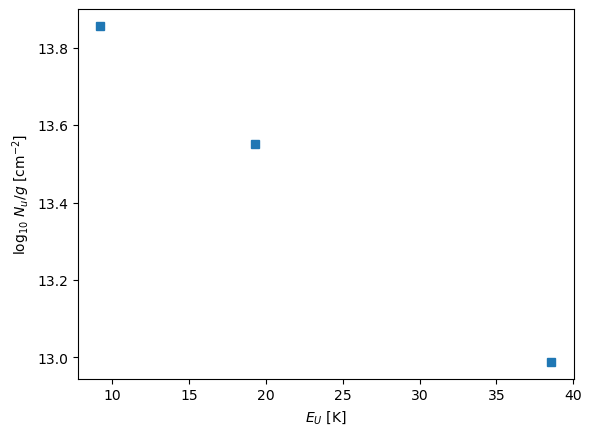

In [101]:
pl.plot((EU_SO[[ind_SO3221, ind_SO2211, ind_SO4544]]*u.erg / constants.k_B).decompose(),
        np.log10((u.Quantity([nup_so32, nup_so22, nup_so45]) / deg_SO[[ind_SO3221, ind_SO2211, ind_SO4544]]).value),
        's')
pl.ylabel("log$_{10}$ $N_u / g$ [cm$^{-2}$]")
pl.xlabel("$E_U$ [K]");

In [102]:
from astropy import modeling
from astropy.modeling.models import custom_model

@custom_model
def model(eupper, logcolumn=np.log(1e13), tem=20):
    """
    Calculate the quantity N_u/g_u as a function of E_u in Kelvin

    The 'logcolumn' quantity is N_tot / Q_tot

    Temperature is the excitation temperature
    """

    result = -1/tem * eupper + logcolumn

    return result
fitter = modeling.fitting.LevMarLSQFitter()

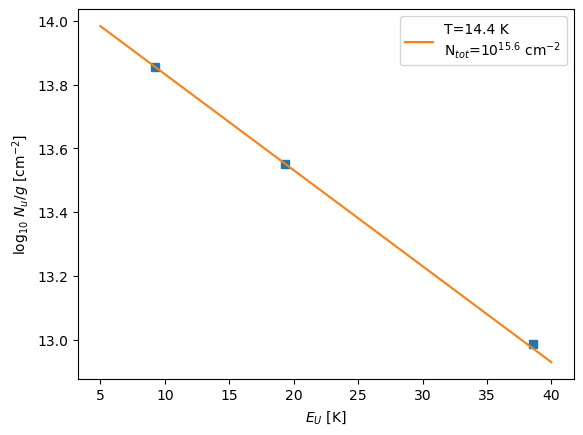

In [103]:
xvals = (EU_SO[[ind_SO3221, ind_SO2211,]]*u.erg / constants.k_B).decompose().value
yvals = np.log((u.Quantity([nup_so32, nup_so22]) / deg_SO[[ind_SO3221, ind_SO2211]]).value)
rslt = fitter(model(), xvals, yvals)

# plot 4544 but don't include in fit
xvals = (EU_SO[[ind_SO3221, ind_SO2211, ind_SO4544]]*u.erg / constants.k_B).decompose().value
yvals = np.log((u.Quantity([nup_so32, nup_so22, nup_so45]) / deg_SO[[ind_SO3221, ind_SO2211, ind_SO4544]]).value)
pl.plot(xvals,
        yvals * np.log10(np.exp(1)),
        's')
pl.plot(np.linspace(5, 40), rslt(np.linspace(5, 40)) * np.log10(np.exp(1)),
        label=f'T={rslt.tem.value:0.1f} K\n'
              f'N$_{{tot}}$=$10^{{{np.log10(np.exp(rslt.logcolumn.value)*partfunc_SO(rslt.tem)):0.1f}}} $ cm$^{{-2}}$'
        )
pl.ylabel("log$_{10}$ $N_u / g$ [cm$^{-2}$]")
pl.xlabel("$E_U$ [K]");
pl.legend(loc='best');

In [104]:
log10col_SO = np.log10(np.exp(rslt.logcolumn.value)*partfunc_SO(rslt.tem))
log10col_SO

15.58563958092594

## Model SO and CS

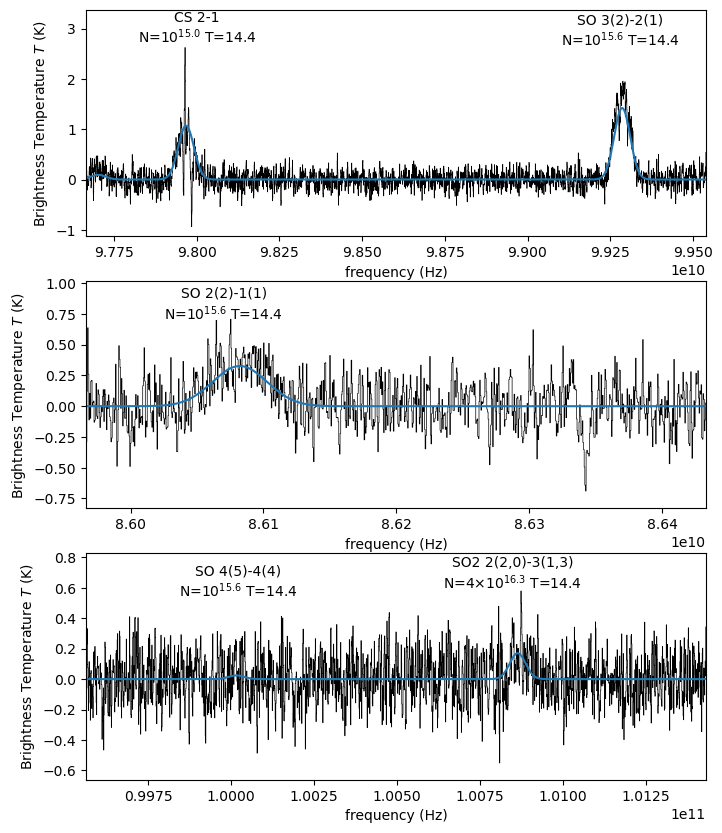

In [105]:
tex = rslt.tem * u.K
column_SO = (10**log10col_SO)*u.cm**-2
column_SO2 = 2e16*u.cm**-2
column_34SO = column_SO/16
column_CS = 1e15*u.cm**-2
sospw33mod = (lte_molecule.generate_model(spw33.xarr,
                            41*u.km/u.s, 71*u.km/u.s, tex=tex, column=column_SO,
                            freqs=freqs, aij=aij, deg=deg, EU=EU, partfunc=partfunc) + 
              lte_molecule.generate_model(spw33.xarr,
                            41*u.km/u.s, 71*u.km/u.s, tex=tex, column=column_34SO,
                            freqs=freqs_34SO, aij=aij_34SO, deg=deg_34SO, EU=EU_34SO, partfunc=partfunc_34SO) + 
              lte_molecule.generate_model(spw33.xarr,
                            41*u.km/u.s, 71*u.km/u.s, tex=tex, column=column_CS,
                            freqs=freqs_CS, aij=aij_CS, deg=deg_CS, EU=EU_CS, partfunc=partfunc_CS)
             )
sospw25mod = lte_molecule.generate_model(spw25.xarr,
                            41*u.km/u.s, 71*u.km/u.s, tex=tex, column=column_SO,
                            freqs=freqs, aij=aij, deg=deg, EU=EU, partfunc=partfunc)
fig = pl.figure(figsize=(8, 10))
spw33.plotter(axis=pl.subplot(3,1,1))
spw33.plotter.axis.plot(spw33.xarr.value, sospw33mod)
pl.text(98.0e9, 0.050*JtoK, f"CS 2-1\nN=$10^{{{np.log10(column_CS.value):0.1f}}}$ T={tex.value:0.1f}", ha='center')
pl.text(99.28e9, 0.049*JtoK, f"SO 3(2)-2(1)\nN=10$^{{{np.log10(column_SO.value):0.1f}}}$ T={tex.value:0.1f}", ha='center')
spw25.plotter(axis=pl.subplot(3,1,2))
spw25.plotter.axis.plot(spw25.xarr.value, sospw25mod)
pl.text(86.07e9, 0.013*JtoK, f"SO 2(2)-1(1)\nN=10$^{{{np.log10(column_SO.value):0.1f}}}$ T={tex.value:0.1f}", ha='center')

sospw35mod = (
              lte_molecule.generate_model(spw35.xarr,
                            41*u.km/u.s, 71*u.km/u.s, tex=tex, column=column_SO,
                            freqs=freqs_SO, aij=aij_SO, deg=deg_SO, EU=EU_SO, partfunc=partfunc_SO) +
              lte_molecule.generate_model(spw35.xarr,
                            41*u.km/u.s, 71*u.km/u.s, tex=tex, column=column_SO2,
                            freqs=freqs_SO2, aij=aij_SO2, deg=deg_SO2, EU=EU_SO2, partfunc=partfunc_SO2) 
             )
spw35.plotter(axis=pl.subplot(3,1,3))
spw35.plotter.axis.plot(spw35.xarr.value, sospw35mod)
pl.text(100.02e9, 0.010*JtoK, f"SO 4(5)-4(4)\nN=10$^{{{np.log10(column_SO.value):0.1f}}}$ T={tex.value:0.1f}", ha='center');
pl.text(100.85e9, 0.011*JtoK, f"SO2 2(2,0)-3(1,3)\nN=4$\\times$10$^{{{np.log10(column_SO2.value):0.1f}}}$ T={tex.value:0.1f}", ha='center');
fig.savefig("/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/LTE_bestfit.pdf", bbox_inches='tight')

### Check optical depth

Text(0.5, 1.0, 'optical depth of the models in spw33')

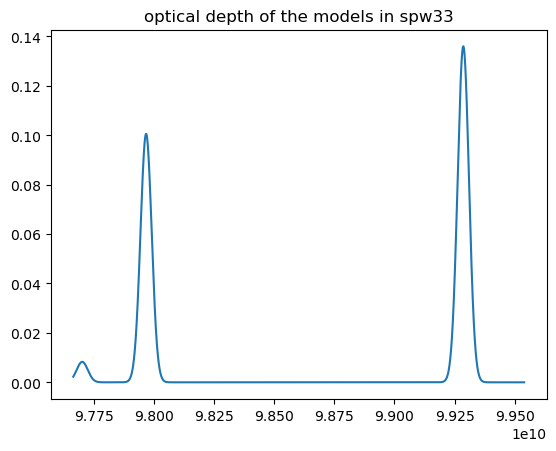

In [106]:
taus = (lte_molecule.generate_model(spw33.xarr,
                            41*u.km/u.s, 71*u.km/u.s, tex=tex, column=column_SO,
                            freqs=freqs_SO, aij=aij_SO, deg=deg_SO, EU=EU_SO, partfunc=partfunc_SO, get_tau=True) + 
        lte_molecule.generate_model(spw33.xarr,
                      41*u.km/u.s, 71*u.km/u.s, tex=tex, column=column_34SO,
                      freqs=freqs_34SO, aij=aij_34SO, deg=deg_34SO, EU=EU_34SO, partfunc=partfunc_34SO, get_tau=True) + 
        lte_molecule.generate_model(spw33.xarr,
                      41*u.km/u.s, 71*u.km/u.s, tex=tex, column=column_CS,
                      freqs=freqs_CS, aij=aij_CS, deg=deg_CS, EU=EU_CS, partfunc=partfunc_CS, get_tau=True))
pl.plot(spw33.xarr, taus)
pl.title("optical depth of the models in spw33")

### Smooth version

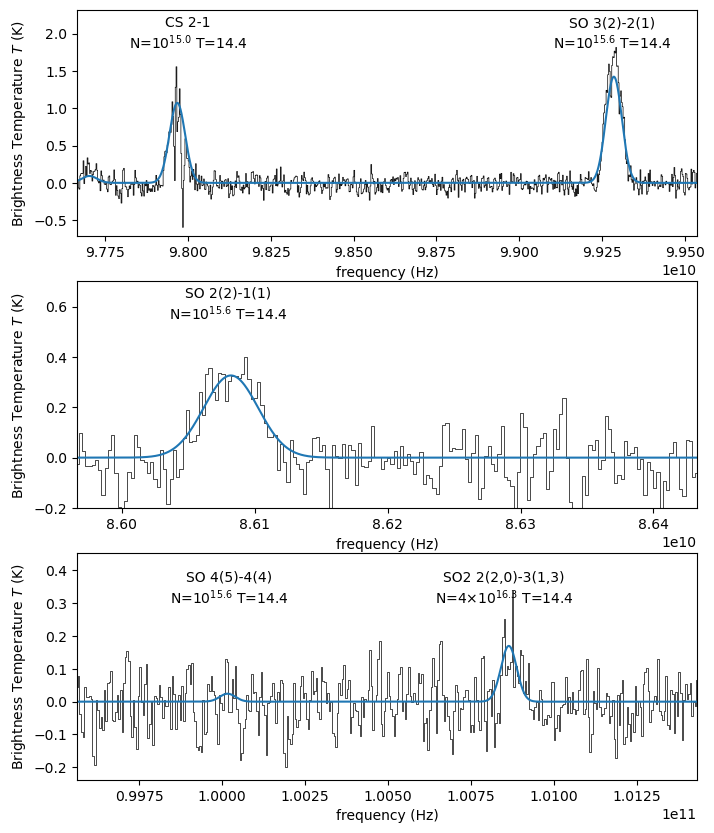

In [107]:
# smooth version, with contsub
spw33sm = spw33.copy()
spw33sm.smooth(5)
spw33sm.data -= np.median(spw33sm.data)
spw35sm = spw35.copy()
spw35sm.smooth(5)
spw35sm.data -= np.median(spw35sm.data)
spw25sm = spw25.copy()
spw25sm.smooth(5)
spw25sm.data -= np.median(spw25sm.data)

sospw33mod = (lte_molecule.generate_model(spw33.xarr,
                            41*u.km/u.s, 71*u.km/u.s, tex=tex, column=column_SO,
                            freqs=freqs, aij=aij, deg=deg, EU=EU, partfunc=partfunc) + 
              lte_molecule.generate_model(spw33.xarr,
                            41*u.km/u.s, 71*u.km/u.s, tex=tex, column=column_34SO,
                            freqs=freqs_34SO, aij=aij_34SO, deg=deg_34SO, EU=EU_34SO, partfunc=partfunc_34SO) + 
              lte_molecule.generate_model(spw33.xarr,
                            41*u.km/u.s, 71*u.km/u.s, tex=tex, column=column_CS,
                            freqs=freqs_CS, aij=aij_CS, deg=deg_CS, EU=EU_CS, partfunc=partfunc_CS)
             )
sospw25mod = lte_molecule.generate_model(spw25.xarr,
                            41*u.km/u.s, 71*u.km/u.s, tex=tex, column=column_SO,
                            freqs=freqs, aij=aij, deg=deg, EU=EU, partfunc=partfunc)
pl.figure(figsize=(8, 10))
spw33sm.plotter(axis=pl.subplot(3,1,1))
spw33sm.plotter.axis.plot(spw33.xarr.value, sospw33mod)
pl.text(98.0e9, 1.8, f"CS 2-1\nN=$10^{{{np.log10(column_CS.value):0.1f}}}$ T={tex.value:0.1f}", ha='center')
pl.text(99.28e9, 1.8, f"SO 3(2)-2(1)\nN=10$^{{{np.log10(column_SO.value):0.1f}}}$ T={tex.value:0.1f}", ha='center')
spw25sm.plotter(axis=pl.subplot(3,1,2))
spw25sm.plotter.axis.plot(spw25.xarr.value, sospw25mod)
pl.text(86.08e9, 0.55, f"SO 2(2)-1(1)\nN=10$^{{{np.log10(column_SO.value):0.1f}}}$ T={tex.value:0.1f}", ha='center')
spw25sm.plotter.axis.set_ylim(-0.2, 0.7)

sospw35mod = (
              lte_molecule.generate_model(spw35.xarr,
                            41*u.km/u.s, 71*u.km/u.s, tex=tex, column=column_SO,
                            freqs=freqs_SO, aij=aij_SO, deg=deg_SO, EU=EU_SO, partfunc=partfunc_SO) +
              lte_molecule.generate_model(spw35.xarr,
                            41*u.km/u.s, 71*u.km/u.s, tex=tex, column=column_SO2,
                            freqs=freqs_SO2, aij=aij_SO2, deg=deg_SO2, EU=EU_SO2, partfunc=partfunc_SO2) 
             )
spw35sm.plotter(axis=pl.subplot(3,1,3))
spw35sm.plotter.axis.plot(spw35.xarr.value, sospw35mod)
pl.text(100.02e9, 0.3, f"SO 4(5)-4(4)\nN=10$^{{{np.log10(column_SO.value):0.1f}}}$ T={tex.value:0.1f}", ha='center');
pl.text(100.85e9, 0.3, f"SO2 2(2,0)-3(1,3)\nN=4$\\times$10$^{{{np.log10(column_SO2.value):0.1f}}}$ T={tex.value:0.1f}", ha='center');

## Test filling factor limits

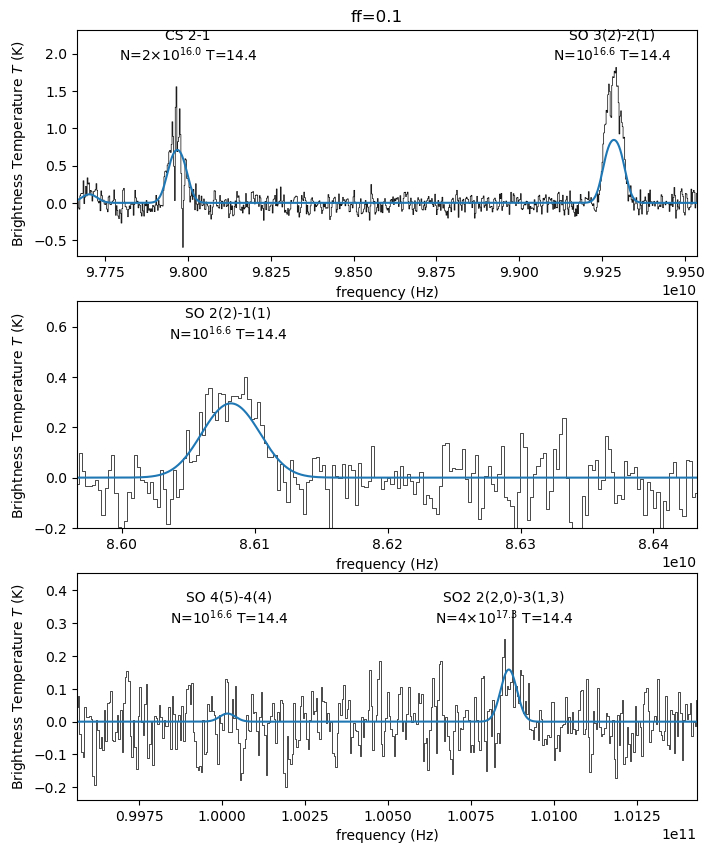

In [108]:
tex = 14.4 * u.K
ff = 0.1
column_SO = 10**15.6*u.cm**-2 / ff
column_SO2 = 2e16*u.cm**-2 / ff
column_34SO = 5e15/16*u.cm**-2 / ff
column_CS = 1e15*u.cm**-2 / ff

sospw33mod = (lte_molecule.generate_model(spw33.xarr,
                            41*u.km/u.s, 71*u.km/u.s, tex=tex, column=column_SO,
                            freqs=freqs, aij=aij, deg=deg, EU=EU, partfunc=partfunc) + 
              lte_molecule.generate_model(spw33.xarr,
                            41*u.km/u.s, 71*u.km/u.s, tex=tex, column=column_34SO,
                            freqs=freqs_34SO, aij=aij_34SO, deg=deg_34SO, EU=EU_34SO, partfunc=partfunc_34SO) + 
              lte_molecule.generate_model(spw33.xarr,
                            41*u.km/u.s, 71*u.km/u.s, tex=tex, column=column_CS,
                            freqs=freqs_CS, aij=aij_CS, deg=deg_CS, EU=EU_CS, partfunc=partfunc_CS)
             ) * ff
sospw25mod = lte_molecule.generate_model(spw25.xarr,
                            41*u.km/u.s, 71*u.km/u.s, tex=tex, column=column_SO,
                            freqs=freqs, aij=aij, deg=deg, EU=EU, partfunc=partfunc) * ff
pl.figure(figsize=(8, 10))
spw33sm.plotter(axis=pl.subplot(3,1,1))
spw33sm.plotter.axis.plot(spw33.xarr.value, sospw33mod)
pl.text(98.0e9, 1.9, f"CS 2-1\nN=2$\\times10^{{{np.log10(column_CS.value):0.1f}}}$ T={tex.value:0.1f}", ha='center')
pl.text(99.28e9, 1.9, f"SO 3(2)-2(1)\nN=10$^{{{np.log10(column_SO.value):0.1f}}}$ T={tex.value:0.1f}", ha='center')
spw25sm.plotter(axis=pl.subplot(3,1,2))
spw25sm.plotter.axis.plot(spw25.xarr.value, sospw25mod)
pl.text(86.08e9, 0.55, f"SO 2(2)-1(1)\nN=10$^{{{np.log10(column_SO.value):0.1f}}}$ T={tex.value:0.1f}", ha='center')
spw25sm.plotter.axis.set_ylim(-0.2, 0.7)

sospw35mod = (
              lte_molecule.generate_model(spw35.xarr,
                            41*u.km/u.s, 71*u.km/u.s, tex=tex, column=column_SO,
                            freqs=freqs_SO, aij=aij_SO, deg=deg_SO, EU=EU_SO, partfunc=partfunc_SO) +
              lte_molecule.generate_model(spw35.xarr,
                            41*u.km/u.s, 71*u.km/u.s, tex=tex, column=column_SO2,
                            freqs=freqs_SO2, aij=aij_SO2, deg=deg_SO2, EU=EU_SO2, partfunc=partfunc_SO2) 
             ) * ff
spw35sm.plotter(axis=pl.subplot(3,1,3))
spw35sm.plotter.axis.plot(spw35.xarr.value, sospw35mod)
pl.text(100.02e9, 0.3, f"SO 4(5)-4(4)\nN=10$^{{{np.log10(column_SO.value):0.1f}}}$ T={tex.value:0.1f}", ha='center');
pl.text(100.85e9, 0.3, f"SO2 2(2,0)-3(1,3)\nN=4$\\times$10$^{{{np.log10(column_SO2.value):0.1f}}}$ T={tex.value:0.1f}", ha='center');
pl.suptitle(y=0.9, t=f"ff={ff}");

## CH3SH search in spw35

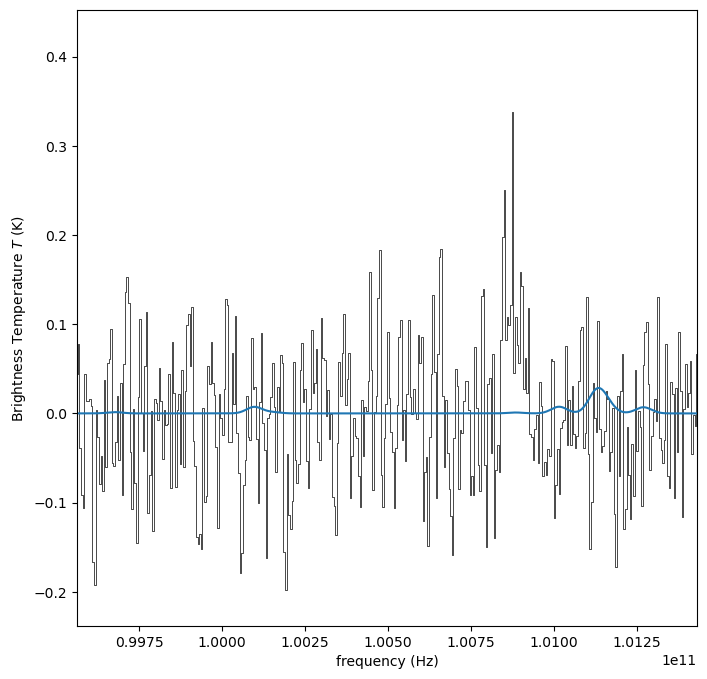

In [109]:
tex = 20 * u.K
column_CH3SH = 2e14*u.cm**-2
sospw35mod = (
              lte_molecule.generate_model(spw35.xarr,
                            41*u.km/u.s, 71*u.km/u.s, tex=tex, column=column_CH3SH,
                            freqs=freqs_CH3SH, aij=aij_CH3SH, deg=deg_CH3SH, EU=EU_CH3SH, partfunc=partfunc_CH3SH) 
             )
pl.figure(figsize=(8, 8))
spw35sm.plotter(axis=pl.subplot(1,1,1))
spw35sm.plotter.axis.plot(spw35.xarr.value, sospw35mod)

## Demonstrate temperature limits from SO

Text(0.5, 0.98, 'T=60K is inconsistent with the SO line ratio')

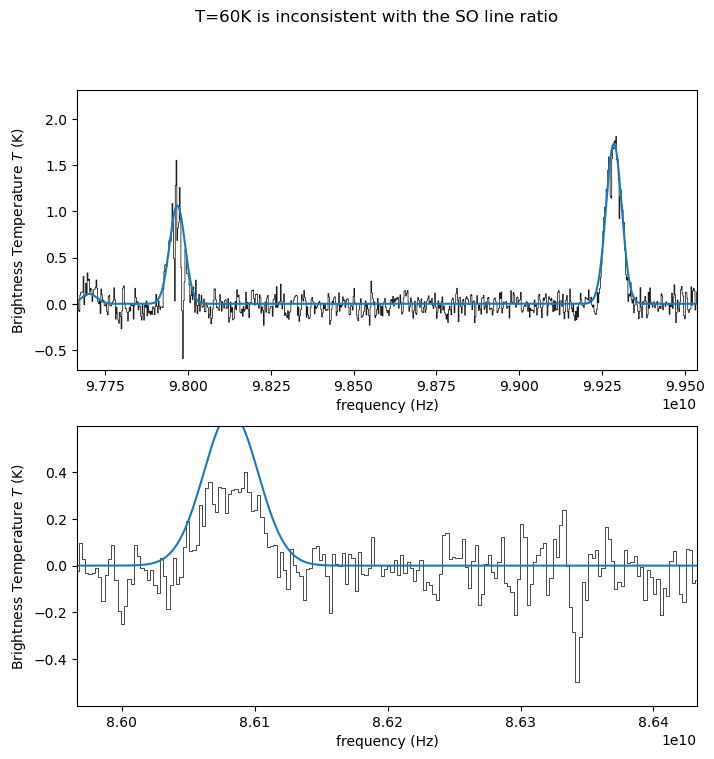

In [110]:
tex = 60 * u.K
column_SO = 1.4e16*u.cm**-2
column_CS = 2.5e15*u.cm**-2
column_34SO = column_SO/16
sospw33mod = (lte_molecule.generate_model(spw33.xarr,
                            41*u.km/u.s, 71*u.km/u.s, tex=tex, column=column_SO,
                            freqs=freqs, aij=aij, deg=deg, EU=EU, partfunc=partfunc) + 
              lte_molecule.generate_model(spw33.xarr,
                            41*u.km/u.s, 71*u.km/u.s, tex=tex, column=column_34SO,
                            freqs=freqs_34SO, aij=aij_34SO, deg=deg_34SO, EU=EU_34SO, partfunc=partfunc_34SO) + 
              lte_molecule.generate_model(spw33.xarr,
                            41*u.km/u.s, 71*u.km/u.s, tex=tex, column=column_CS,
                            freqs=freqs_CS, aij=aij_CS, deg=deg_CS, EU=EU_CS, partfunc=partfunc_CS)
             )
sospw25mod = lte_molecule.generate_model(spw25.xarr,
                            41*u.km/u.s, 71*u.km/u.s, tex=tex, column=column_SO,
                            freqs=freqs, aij=aij, deg=deg, EU=EU, partfunc=partfunc)
pl.figure(figsize=(8, 8))
spw33sm.plotter(axis=pl.subplot(2,1,1))
spw33sm.plotter.axis.plot(spw33.xarr.value, sospw33mod)
spw25sm.plotter(axis=pl.subplot(2,1,2))
spw25sm.plotter.axis.plot(spw25.xarr.value, sospw25mod)
pl.suptitle("T=60K is inconsistent with the SO line ratio")

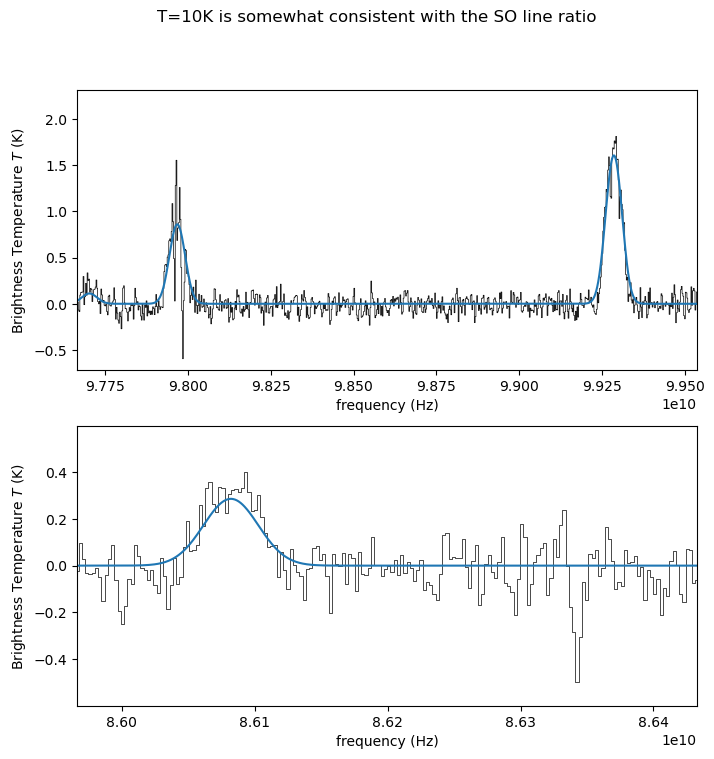

In [111]:
tex = 10 * u.K
column_SO = 50*8e13*u.cm**-2
column_CS = 50*1.5e13*u.cm**-2
column_34SO = column_SO/16
sospw33mod = (lte_molecule.generate_model(spw33.xarr,
                            41*u.km/u.s, 71*u.km/u.s, tex=tex, column=column_SO,
                            freqs=freqs, aij=aij, deg=deg, EU=EU, partfunc=partfunc) + 
              lte_molecule.generate_model(spw33.xarr,
                            41*u.km/u.s, 71*u.km/u.s, tex=tex, column=column_34SO,
                            freqs=freqs_34SO, aij=aij_34SO, deg=deg_34SO, EU=EU_34SO, partfunc=partfunc_34SO) + 
              lte_molecule.generate_model(spw33.xarr,
                            41*u.km/u.s, 71*u.km/u.s, tex=tex, column=column_CS,
                            freqs=freqs_CS, aij=aij_CS, deg=deg_CS, EU=EU_CS, partfunc=partfunc_CS)
             )
sospw25mod = lte_molecule.generate_model(spw25.xarr,
                            41*u.km/u.s, 71*u.km/u.s, tex=tex, column=column_SO,
                            freqs=freqs, aij=aij, deg=deg, EU=EU, partfunc=partfunc)
pl.figure(figsize=(8, 8))
spw33sm.plotter(axis=pl.subplot(2,1,1))
spw33sm.plotter.axis.plot(spw33.xarr.value, sospw33mod)
spw25sm.plotter(axis=pl.subplot(2,1,2))
spw25sm.plotter.axis.plot(spw25.xarr.value, sospw25mod)
pl.suptitle("T=10K is somewhat consistent with the SO line ratio");

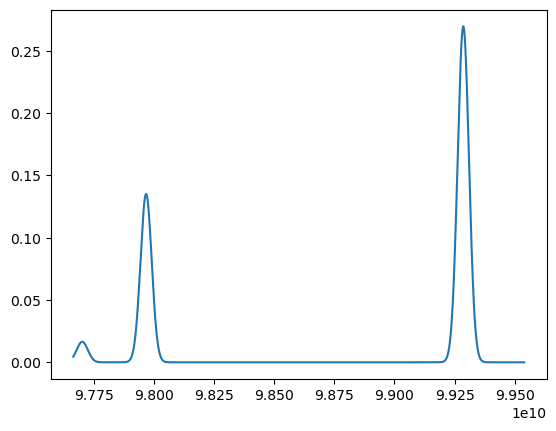

In [112]:
taus = (lte_molecule.generate_model(spw33.xarr,
                            41*u.km/u.s, 71*u.km/u.s, tex=tex, column=column_SO,
                            freqs=freqs, aij=aij, deg=deg, EU=EU, partfunc=partfunc, get_tau=True) + 
              lte_molecule.generate_model(spw33.xarr,
                            41*u.km/u.s, 71*u.km/u.s, tex=tex, column=column_34SO,
                            freqs=freqs_34SO, aij=aij_34SO, deg=deg_34SO, EU=EU_34SO, partfunc=partfunc_34SO, get_tau=True) + 
              lte_molecule.generate_model(spw33.xarr,
                            41*u.km/u.s, 71*u.km/u.s, tex=tex, column=column_CS,
                            freqs=freqs_CS, aij=aij_CS, deg=deg_CS, EU=EU_CS, partfunc=partfunc_CS, get_tau=True))
pl.plot(spw33.xarr, taus);

# splatalogue: check for a line at th ebottom of spw33?

In [113]:
Splatalogue.query_lines(97.7095 *u.GHz, 97.8 * u.GHz, energy_max=50, energy_type='eu_k',)['Species',
  'Chemical Name', 'Freq-GHz(rest frame,redshifted)', 'E_U (K)', 'Resolved QNs', ].pprint(max_lines=500)

      Species                   Chemical Name             Freq-GHz(rest frame,redshifted) E_U (K)            Resolved QNs         
------------------- ------------------------------------- ------------------------------- -------- -------------------------------
gGG'g-CH2OHCH2CH2OH                1,3-propanediol, gGG'g                              -- 33.07617          13(4,10)-12(3,9),v=0-0
gGG'g-CH2OHCH2CH2OH                1,3-propanediol, gGG'g                              -- 33.07804          13(4,10)-12(3,9),v=1-1
    CH3CHNH2COOH-II                       &alpha;-Alanine                      97.7109153 21.75558                 11(6,5)-10(4,6)
      CH3SD,vt&le;2                      Methyl mercaptan                      97.7117803 12.04928           4(0,4)--3(0,3)-E,vt=0
gGG'g-CH2OHCH2CH2OH                1,3-propanediol, gGG'g                              -- 42.06122         16(1,15)-15(1,14),v=0-1
CH3O13CHO(TopModel)                        Methyl Formate                       97.

# Orbital velocity check
For a Keplerian orbit with width = 71 km/s, where could it be...?

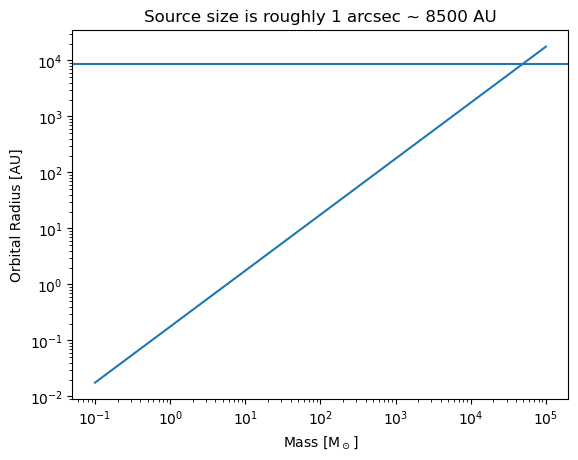

In [114]:
mass = np.geomspace(0.1, 1e5)*u.M_sun
pl.title("Source size is roughly 1 arcsec ~ 8500 AU")
pl.loglog(mass, (constants.G * mass / (71*u.km/u.s)**2).to(u.au))
pl.xlabel("Mass [M$_\odot$]")
pl.ylabel("Orbital Radius [AU]")
pl.axhline(8500);

# Overplot all the lines (to show nondetections)

In [115]:
import aces
linetb = Table.read(f'{aces.conf.basepath}/reduction_ACES/aces/data/tables/linelist.csv')
linetb.sort('col9')
spw_inds = {25: 0, 27:1, 29:2, 31:3, 33:4, 35: 5}
linetb[:3]

Band Name,TP SPW,7m SPW,12m SPW,Center,Bandwidth,F_Lower,F_Upper,F_Resolution,col9,Line,Rest (GHz),V_Lower,V_Upper,V_Res.,_1,References
str10,int64,int64,int64,float64,float64,float64,float64,float64,str3,str27,float64,float64,float64,float64,int64,str30
Cont 2,27,26,35,100.5,1.875,99.5625,101.4375,0.000976563,*,CH3SH 4(0)–3(0) E,101.13965,--,--,2.89,--,Jones et al. (2008)
Cont 2,27,26,35,100.5,1.875,99.5625,101.4375,0.000976563,*,CH3SH 4(0)–3(0) A,101.13916,--,--,2.89,--,Jones et al. (2008)
Cont 2,27,26,35,100.5,1.875,99.5625,101.4375,0.000976563,*,"NH2CN 5(1,4)-4(1,3)",100.6295,--,--,2.91,--,Jones et al. (2008)


In [116]:
all_spectra = {}
for row in linetb:
    if row['col9'] in ('**', '***') or 'SO' in row['Line'] or 'CCS' in row['Line']:
        scube = (scubes[spw_inds[row['12m SPW']]]
                 .with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value=row['Rest (GHz)']*u.GHz)
                 .spectral_slab(-350*u.km/u.s, 350*u.km/u.s)
                 .to(u.K)
                )
        yy, xx = scube.wcs.celestial.world_to_pixel(coord)
        sp_ = scube[:, int(yy), int(xx)]
        sp = pyspeckit.Spectrum.from_hdu(sp_.hdu)
        smfac = (5*u.km/u.s / sp.xarr.cdelt()).decompose().value
        sp.smooth(smfac, downsample=True)
        all_spectra[row['Line']] = sp
        print(row['Line'], end=', ')

HN13C 1-0, 

H13CO+ 1-0, 

H40 Alpha, 

SiO 2-1, 

CH3C3N, 

H13CN 1-0, 

SiO 2-1 v=1 maser, 

SO 3(2)-2(1), 

HNCO 4-3, 

CS 2-1, 

HC3N 11-10, 

HCO+ 1-0, 

SO 4(5)-4(4), 

SO2 2(2,0)-3(1,3), 

SO 2(2)-1(1), 

CCS 7(6)-6(5), 

SO2 7(3,5)–8(2,6), 

34SO  3(2)–2(1), 

33SO, 

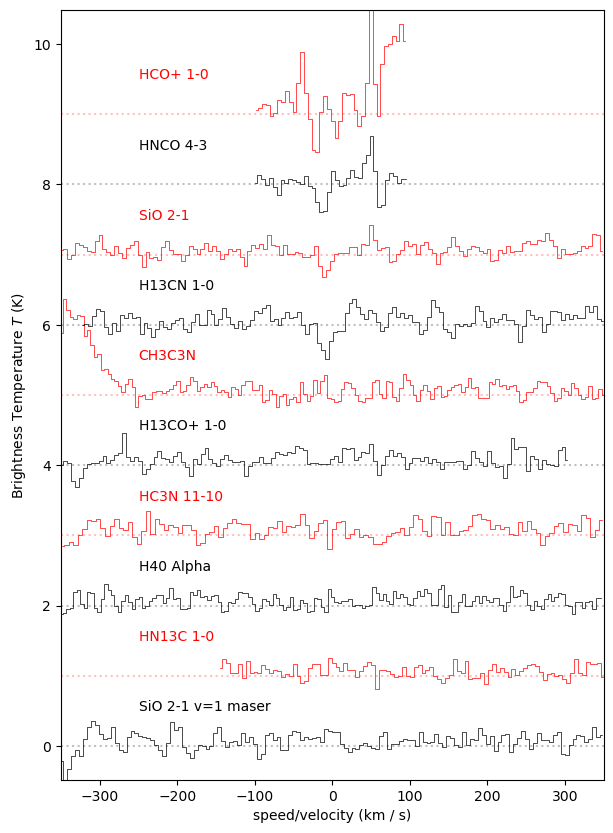

In [117]:
figure = pl.figure(figsize=(7, 10))
ii = 0
ax = figure.gca()
mx = 0
mn = 0

order = sorted(all_spectra, key=lambda x: all_spectra[x].slice(-100*u.km/u.s, 150*u.km/u.s).data.max())
order = [k for k in order if not('CS' in k or 'SO' in k)]

for ii, linename in enumerate(order):
    sp = all_spectra[linename]
    offset = 1 * ii + 1*('CS' in linename) 
    sp.data += offset
    sp.plotter(axis=ax, clear=False, color='r' if ii%2 == 1 else 'k')
    sp.plotter.axis.axhline(offset, linestyle=':', alpha=0.25, color='r' if ii%2 == 1 else 'k') 
    mx = np.max([mx, sp.data.max()])
    mn = np.min([mn, sp.data.min()])
    sp.data -= offset
    ax.text(-250, offset + 0.5, linename, color='r' if ii%2 == 1 else 'k')

ax.set_ylim(mn-0.001, mx+0.001);
ax.set_xlim(-350, 350);
figure.savefig("/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/NonDetection_Overlays.pdf", bbox_inches='tight')

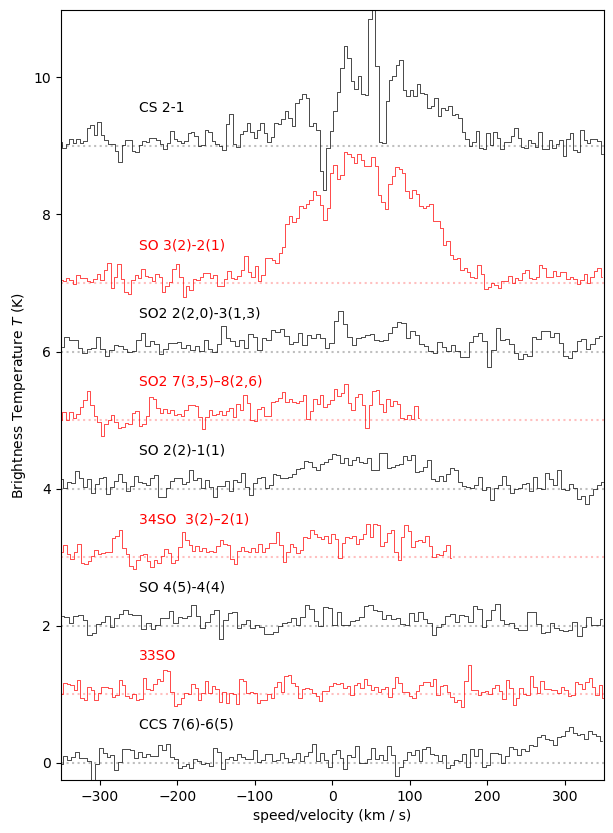

In [118]:
figure = pl.figure(figsize=(7, 10))
ii = 0
ax = figure.gca()
mx = 0
mn = 0

order = sorted(all_spectra, key=lambda x: all_spectra[x].slice(-100*u.km/u.s, 150*u.km/u.s).data.max())
order = [k for k in order if 'CS' in k or 'SO' in k]

for ii, linename in enumerate(order):
    sp = all_spectra[linename]
    offset = 1 * ii + 1*('CS' in linename and 'CCS' not in linename) 
    sp.data += offset
    sp.plotter(axis=ax, clear=False, color='r' if ii%2 == 1 else 'k')
    sp.plotter.axis.axhline(offset, linestyle=':', alpha=0.25, color='r' if ii%2 == 1 else 'k') 
    mx = np.max([mx, sp.data.max()])
    mn = np.min([mn, sp.data.min()])
    sp.data -= offset
    ax.text(-250, offset + 0.5, linename, color='r' if ii%2 == 1 else 'k')

ax.set_ylim(mn-0.001, mx+0.001);
ax.set_xlim(-350, 350);
figure.savefig("/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/CSandSO_Overlays.pdf", bbox_inches='tight')

## Do the same for Betsy's data

In [150]:
ls /orange/adamginsburg/ACES/ancillary/data/2017.1.01185.S/science_goal.uid___A001_X12a3_Xe7/group.uid___A001_X12a3_Xe8/member.uid___A001_X12a3_Xe9/calibrated/*image.pbcor -d

/orange/adamginsburg/ACES/ancillary/data/2017.1.01185.S/science_goal.uid___A001_X12a3_Xe7/group.uid___A001_X12a3_Xe8/member.uid___A001_X12a3_Xe9/calibrated/50_kms_cloud_sci.spw0_1_2_3_4_5_6_7_8_9_10_11_12_13_14_15.mfs.I.manual.image.pbcor/
/orange/adamginsburg/ACES/ancillary/data/2017.1.01185.S/science_goal.uid___A001_X12a3_Xe7/group.uid___A001_X12a3_Xe8/member.uid___A001_X12a3_Xe9/calibrated/50_kms_cloud_sci.spw0_4_8_12.cube.I.manual.image.pbcor/
/orange/adamginsburg/ACES/ancillary/data/2017.1.01185.S/science_goal.uid___A001_X12a3_Xe7/group.uid___A001_X12a3_Xe8/member.uid___A001_X12a3_Xe9/calibrated/50_kms_cloud.spw0.contsub.cube.image.pbcor/
/orange/adamginsburg/ACES/ancillary/data/2017.1.01185.S/science_goal.uid___A001_X12a3_Xe7/group.uid___A001_X12a3_Xe8/member.uid___A001_X12a3_Xe9/calibrated/50_kms_cloud.spw1.cube.image.pbcor/
/orange/adamginsburg/ACES/ancillary/data/2017.1.01185.S/science_goal.uid___A001_X12a3_Xe7/group.uid___A001_X12a3_Xe8/member.uid___A001_X12a3_Xe9/calibrated/

In [151]:
fns_2017 = glob.glob("/orange/adamginsburg/ACES/ancillary/data/2017.1.01185.S/science_goal.uid___A001_X12a3_Xe7/group.uid___A001_X12a3_Xe8/member.uid___A001_X12a3_Xe9/calibrated/*cube*image.pbcor")
scubes2017 = [SpectralCube.read(fn, format='casa_image').subcube_from_regions([region]) for fn in fns_2017]

divide by zero encountered in long_scalars
divide by zero encountered in long_scalars
divide by zero encountered in long_scalars
divide by zero encountered in long_scalars
divide by zero encountered in long_scalars


In [152]:
scubes2017[1].find_lines(chemical_name=' SO ')

Species,Chemical Name,"Freq-GHz(rest frame,redshifted)","Freq Err(rest frame,redshifted)","Meas Freq-GHz(rest frame,redshifted)","Meas Freq Err(rest frame,redshifted)",Resolved QNs,CDMS/JPL Intensity,S<sub>ij</sub>&#956;<sup>2</sup> (D<sup>2</sup>),S<sub>ij</sub>,Log<sub>10</sub> (A<sub>ij</sub>),Lovas/AST Intensity,E_L (cm^-1),E_L (K),E_U (cm^-1),E_U (K),Linelist
str13,str15,float64,float64,float64,float64,str9,float64,float64,float64,float64,float64,float64,float64,float64,float64,str5
SO3&Sigma;v=0,Sulfur Monoxide,--,--,344.310612,7e-05,8(8)-7(7),-1.8784,18.55549,7.875,-3.28519,10.93,49.3181,70.95734,60.80307,87.48155,CDMS
SO3&Sigma;v=0,Sulfur Monoxide,--,--,344.310612,7e-05,8(8)-7(7),-1.8699,18.92095,7.876,-3.27672,10.93,49.3181,70.95734,60.80307,87.48155,JPL
SO3&Sigma;v=0,Sulfur Monoxide,344.310792,1.6e-05,--,--,8(8)-7(7),0.0,0.0,0.0,0.0,10.93,0.0,0.0,0.0,0.0,Lovas
SO3&Sigma;v=0,Sulfur Monoxide,344.310792,1.6e-05,344.31061,5e-06,8(8)-7(7),0.0,0.0,0.0,0.0,--,49.318,70.95719,60.80297,87.48141,SLAIM
SO3&Sigma;v=0,Sulfur Monoxide,345.7044744,2.38e-05,--,--,2(3)-2(1),-5.8873,0.00144,0.001,-6.85707,--,3.0999,4.46004,14.63136,21.05114,CDMS
SO3&Sigma;v=0,Sulfur Monoxide,345.7045553,3.68e-05,--,--,2(3)-2(1),-5.8873,0.00144,0.001,-6.8571,--,3.0999,4.46004,14.63136,21.05115,JPL


In [153]:
from astropy import table

In [154]:
tabs = [cu.find_lines(chemical_name=cn, line_lists=['CDMS'], energy_max=100, energy_type='eu_k')
        for cu in scubes2017 for cn in (' 34SO ', ' SO ', ' CO ', ' CS ', 'Carbon Monosulfide', ' SO2 ', ' SiO ', ' SiS ')]
tabs = [minimize_table(t) for t in tabs if len(t) > 0]
b7linetable = table.vstack(tabs)
b7linetable

Species,ChemicalName,QNs,Freq,log10_Aij,EU_K
str13,str18,str17,float64,float64,float64
SO3&Sigma;v=0,Sulfur Monoxide,8(8)-7(7),344.310612,-3.28519,87.48155
SO3&Sigma;v=0,Sulfur Monoxide,2(3)-2(1),345.7044744,-6.85707,21.05114
COv=0,Carbon Monoxide,3-2,345.7959899,-5.60266,33.19169
SO2v=0,Sulfur dioxide,"5(5,1)-6(4,2)",345.1489708,-5.00825,75.14405
SO2v=0,Sulfur dioxide,"13(2,12)-12(1,11)",345.3385377,-3.62327,92.98367
34SO,Sulfur Monoxide,6(7)-7(6),356.8686927,-6.46219,63.83839
SO2v=0,Sulfur dioxide,"10(4,6)-10(3,7)",356.7551899,-3.48406,89.83365
SO2v=0,Sulfur dioxide,"11(4,8)-11(3,9)",357.3875795,-3.47077,99.95222
SO2v=0,Sulfur dioxide,"8(4,4)-8(3,5)",357.5814486,-3.5149,72.36335


In [155]:
all_spectra_b7 = {}
import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    for row in b7linetable:
        for cube in scubes2017:
            scube = (cube.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value=row['Freq']*u.GHz)
                         .spectral_slab(-350*u.km/u.s, 350*u.km/u.s)
                         .to(u.K)
                         )
            if len(scube) <= 2:
                continue
            yy, xx = scube.wcs.celestial.world_to_pixel(coord)
            sp_ = scube[:, int(yy), int(xx)]
            sp = pyspeckit.Spectrum.from_hdu(sp_.hdu)
            smfac = (5*u.km/u.s / sp.xarr.cdelt()).decompose().value
            sp.smooth(smfac, downsample=True)
            line = f"{row['Species']} {row['QNs']}"
            all_spectra_b7[line] = sp
            print(line, end=', ')

SO3&Sigma;v=0 8(8)-7(7), SO3&Sigma;v=0 8(8)-7(7), SO3&Sigma;v=0 2(3)-2(1), COv=0 3-2, SO2v=0 5(5,1)-6(4,2), SO2v=0 13(2,12)-12(1,11), 34SO 6(7)-7(6), SO2v=0 10(4,6)-10(3,7), SO2v=0 11(4,8)-11(3,9), SO2v=0 8(4,4)-8(3,5), SO2v=0 9(4,6)-9(3,7), SO2v=0 7(4,4)-7(3,5), SO2v=0 6(4,2)-6(3,3), 34SO 2(3)-2(1), 34SO 2(3)-2(1), CSv=0 7-6, CSv=0 7-6, 

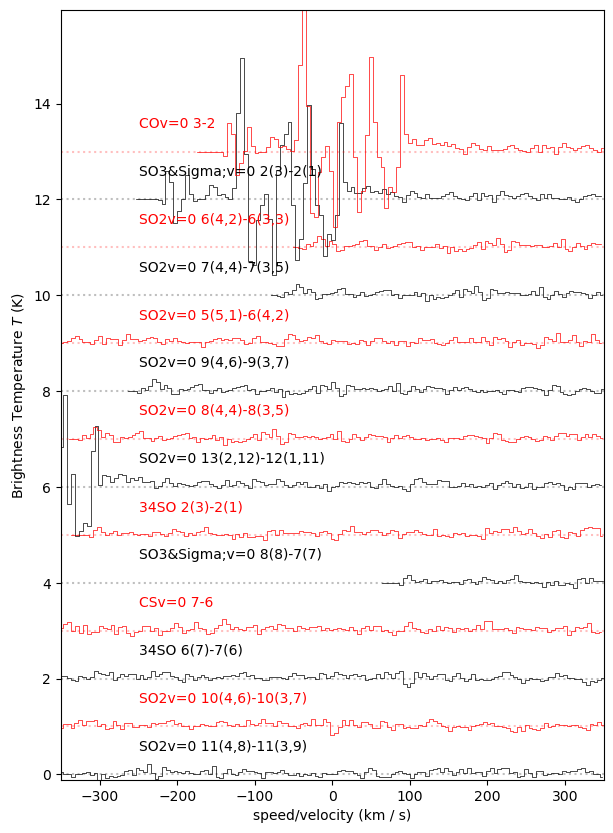

In [156]:
figure = pl.figure(figsize=(7, 10))
ii = 0
ax = figure.gca()
mx = 0
mn = 0

order = sorted(all_spectra_b7, key=lambda x: all_spectra_b7[x].slice(-100*u.km/u.s, 150*u.km/u.s).data.max())
#order = [k for k in order if 'CS' in k or 'SO' in k]

for ii, linename in enumerate(order):
    sp = all_spectra_b7[linename]
    offset = 1 * ii #+ 1*('CS' in linename and 'CCS' not in linename) 
    sp.data += offset
    sp.plotter(axis=ax, clear=False, color='r' if ii%2 == 1 else 'k')
    sp.plotter.axis.axhline(offset, linestyle=':', alpha=0.25, color='r' if ii%2 == 1 else 'k') 
    mx = np.max([mx, sp.data.max()])
    mn = np.min([mn, sp.data.min()])
    sp.data -= offset
    ax.text(-250, offset + 0.5, linename, color='r' if ii%2 == 1 else 'k')

ax.set_ylim(mn-0.001, mx+0.001);
ax.set_xlim(-350, 350);
figure.savefig("/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/B7_spectra_overlays.pdf", bbox_inches='tight')

## Do the same for Tsuboi's data

In [126]:
ls /orange/adamginsburg/ACES/ancillary/data/2012.1.00080.S/science_goal.uid___A002_X6444ba_Xc/group.uid___A002_X6444ba_Xd/member.uid___A002_X6444ba_Xe/calibrated/workdir/

GC50MC_spw1_cube.image.fits        GC50MC_spw2_cube.image.fits
GC50MC_spw1_cube.image.pbcor.fits  GC50MC_spw2_cube.image.pbcor.fits


<Quantity 70.34205249 km / s>

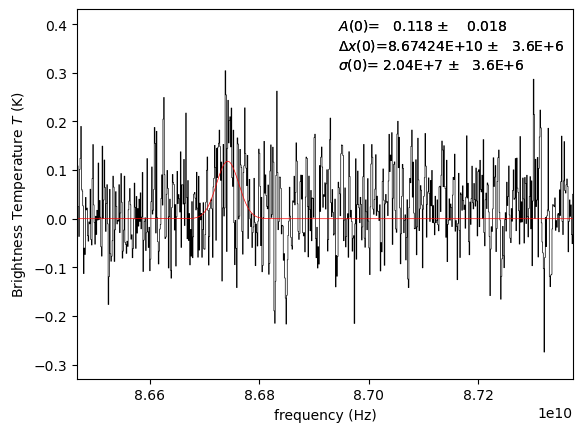

In [163]:
# H13CO+ -  this cell will be incorrect if spw0 is copied over
sp = pyspeckit.Spectrum.from_hdu(scubes2012[0][:, int(y), int(x)].to(u.K).hdu)
sp.smooth(5)
sp.plotter()
sp.specfit(guesses=[0.2, 86.73e9, 7e7, ])
sp.specfit(guesses=[0.2, 86.73e9, 7e7, ])
(sp.specfit.parinfo['WIDTH0'].value / sp.specfit.parinfo['SHIFT0'].value * constants.c).to(u.km/u.s)

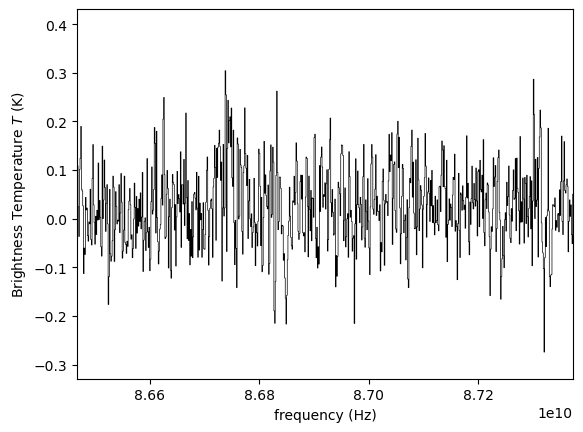

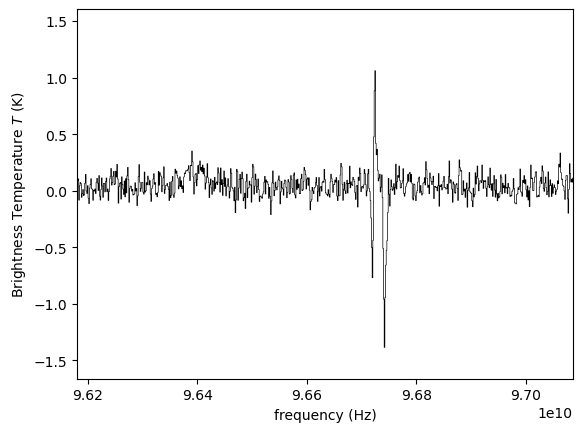

In [158]:
for scube in scubes2012:
    pxcrd = scube.wcs.celestial.world_to_pixel(coord)
    x, y = pxcrd
    sp = pyspeckit.Spectrum.from_hdu(scube[:, int(y), int(x)].to(u.K).hdu)
    sp.smooth(5)
    sp.plotter(figure=pl.figure())

In [137]:
scubes2012[1].find_lines(chemical_name='Carbon Monosulfide')

Species,Chemical Name,"Freq-GHz(rest frame,redshifted)","Freq Err(rest frame,redshifted)","Meas Freq-GHz(rest frame,redshifted)","Meas Freq Err(rest frame,redshifted)",Resolved QNs,CDMS/JPL Intensity,S<sub>ij</sub>&#956;<sup>2</sup> (D<sup>2</sup>),S<sub>ij</sub>,Log<sub>10</sub> (A<sub>ij</sub>),Lovas/AST Intensity,E_L (cm^-1),E_L (K),E_U (cm^-1),E_U (K),Linelist
str7,str18,float64,float64,float64,float64,str16,float64,float64,float64,float64,float64,float64,float64,float64,float64,str5
C34Sv=0,Carbon Monosulfide,--,--,96.41294,5e-05,2-1,-2.7421,7.69728,2.0,-4.79429,--,1.608,1.62098,6.19802,6.24804,JPL
C34Sv=0,Carbon Monosulfide,--,--,96.4129495,2.2e-06,2-1,-2.7462,7.64989,2.0,-4.79698,0.62,1.608,1.62098,6.19802,6.24804,CDMS
C34Sv=0,Carbon Monosulfide,96.41295,1e-05,--,--,2-1,0.0,0.0,0.0,0.0,0.62,0.0,0.0,0.0,0.0,Lovas
C34Sv=0,Carbon Monosulfide,96.412951,0.0,96.41295,1e-06,2-1,0.0,7.66753,2.0,-4.79596,0.62,1.608,1.62098,6.19802,6.24804,SLAIM
C33Sv=1,Carbon Monosulfide,96.4652425,1.6e-06,--,--,"J=2-1, F=1/2-3/2",-7.1691,0.08322,0.022,-6.36174,--,1268.5527,1825.15387,1271.77043,1829.78344,CDMS
C33Sv=1,Carbon Monosulfide,--,--,96.468372,8e-05,"J=2-1, F=3/2-3/2",-6.3629,0.53261,0.142,-5.85656,--,1268.5527,1825.15387,1271.77054,1829.78359,CDMS
C33Sv=1,Carbon Monosulfide,--,--,96.470698,5e-05,"J=2-1, F=5/2-3/2",-6.0687,1.04856,0.28,-5.73844,--,1268.5527,1825.15387,1271.77062,1829.78371,CDMS
C33Sv=1,Carbon Monosulfide,--,--,96.470698,5e-05,"J=2-1, F=7/2-5/2",-5.7889,1.99706,0.533,-5.58358,--,1268.5526,1825.15372,1271.77052,1829.78356,CDMS
C33Sv=1,Carbon Monosulfide,--,--,96.470698,5e-05,"J=2-1, F=1/2-1/2",-6.4701,0.41609,0.111,-5.66272,--,1268.5525,1825.15358,1271.77042,1829.78342,CDMS


In [130]:
from astropy import table

In [147]:
tabs = [cu.find_lines(chemical_name=cn, line_lists=['CDMS'], energy_max=100, energy_type='eu_k')
        for cu in scubes2012 for cn in (' 34SO ', ' SO ', ' CO ', ' CS ', 'Carbon Monosulfide', ' SO2 ', ' SiO ', ' SiS ')]
tabs = [minimize_table(t) for t in tabs if len(t) > 0]
b3linetable = table.vstack(tabs)
b3linetable

Species,ChemicalName,QNs,Freq,log10_Aij,EU_K
str7,str18,str13,float64,float64,float64
SO2v=0,Sulfur dioxide,"8(3,5)-9(2,8)",86.6390877,-5.87204,55.2022
SiOv=0,Silicon Monoxide,2-1,86.84696,-4.53354,6.25203
SiOv=0,Silicon Monoxide,2-1,86.84696,-4.53354,6.25203
34SO,Sulfur Monoxide,4(5)-4(4),96.78176,-6.00614,38.05571
C34Sv=0,Carbon Monosulfide,2-1,96.4129495,-4.79698,6.24804


In [148]:
all_spectra_b3 = {}
import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    for row in b3linetable:
        for cube in scubes2012:
            scube = (cube.with_spectral_unit(u.km/u.s, velocity_convention='radio', rest_value=row['Freq']*u.GHz)
                         .spectral_slab(-350*u.km/u.s, 350*u.km/u.s)
                         .to(u.K)
                         )
            if len(scube) <= 2:
                continue
            yy, xx = scube.wcs.celestial.world_to_pixel(coord)
            sp_ = scube[:, int(yy), int(xx)]
            sp = pyspeckit.Spectrum.from_hdu(sp_.hdu)
            smfac = (5*u.km/u.s / sp.xarr.cdelt()).decompose().value
            sp.smooth(smfac, downsample=True)
            line = f"{row['Species']} {row['QNs']}"
            all_spectra_b3[line] = sp
            print(line, end=', ')

SO2v=0 8(3,5)-9(2,8), SiOv=0 2-1, SiOv=0 2-1, 34SO 4(5)-4(4), C34Sv=0 2-1, 

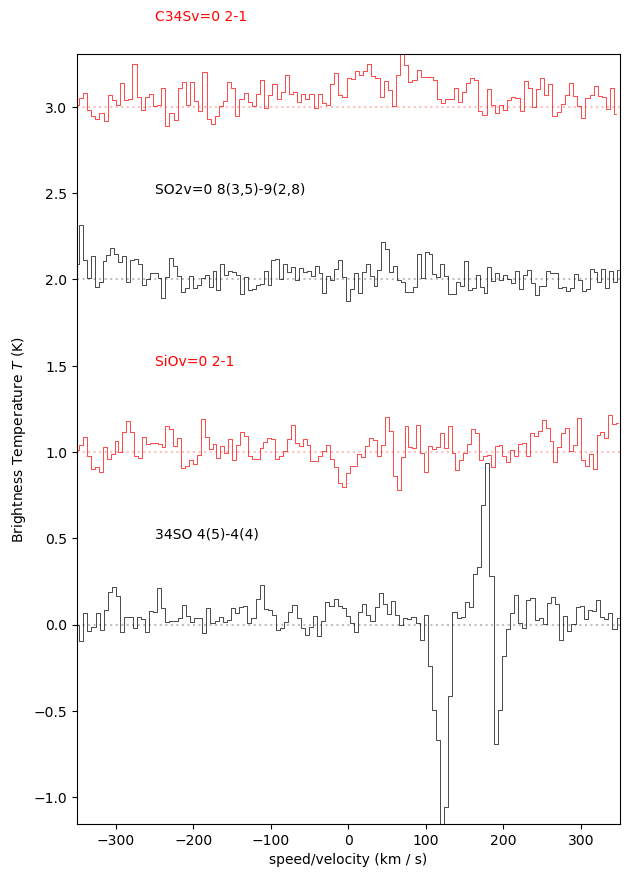

In [149]:
figure = pl.figure(figsize=(7, 10))
ii = 0
ax = figure.gca()
mx = 0
mn = 0

order = sorted(all_spectra_b3, key=lambda x: all_spectra_b3[x].slice(-100*u.km/u.s, 150*u.km/u.s).data.max())
#order = [k for k in order if 'CS' in k or 'SO' in k]

for ii, linename in enumerate(order):
    sp = all_spectra_b3[linename]
    offset = 1 * ii #+ 1*('CS' in linename and 'CCS' not in linename) 
    sp.data += offset
    sp.plotter(axis=ax, clear=False, color='r' if ii%2 == 1 else 'k')
    sp.plotter.axis.axhline(offset, linestyle=':', alpha=0.25, color='r' if ii%2 == 1 else 'k') 
    mx = np.max([mx, sp.data.max()])
    mn = np.min([mn, sp.data.min()])
    sp.data -= offset
    ax.text(-250, offset + 0.5, linename, color='r' if ii%2 == 1 else 'k')

ax.set_ylim(mn-0.001, mx+0.001);
ax.set_xlim(-350, 350);
figure.savefig("/orange/adamginsburg/ACES/broadline_sources/G0.025-0.073/B3Tsuboi_spectra_overlays.pdf", bbox_inches='tight')

# Search for other data

In [220]:
from astroquery.alma import Alma
from astroquery.alma.utils import parse_frequency_support
alma = Alma()

In [223]:
result = alma.query(payload=dict(project_code='2012.1.00080.S'), public=None)
frqsupp_201280 = parse_frequency_support(result['frequency_support'][0])
result['obs_id', 's_resolution', 'proposal_id', 'frequency', 'sensitivity_10kms']# 'frequency_support']

obs_id,s_resolution,proposal_id,frequency,sensitivity_10kms
,arcsec,,GHz,mJy / beam
str64,float64,str64,float64,float64
uid://A002/X8981ca/X3.source.J2253+1608.spw.33,63.39784497492764,2012.1.00080.S,97.98187723143462,21.268906889877318
uid://A002/X8981ca/X3.source.J2253+1608.spw.35,63.39784497492764,2012.1.00080.S,97.02475325315575,21.369175216411943
uid://A002/X8981ca/X3.source.J2253+1608.spw.37,63.39784497492764,2012.1.00080.S,86.73265670946229,22.52010325931357
uid://A002/X8981ca/X3.source.J2253+1608.spw.39,63.39784497492764,2012.1.00080.S,85.71214713670295,22.649393986449816
uid://A002/X8981ca/X5.source.GC50MC.spw.19,63.39674430751842,2012.1.00080.S,96.54156911746472,16.158283657133353
uid://A002/X8981ca/X5.source.GC50MC.spw.17,63.39674430751842,2012.1.00080.S,97.9809529996788,16.044090684398615
uid://A002/X8981ca/X5.source.GC50MC.spw.23,63.39674430751842,2012.1.00080.S,85.7002703129451,18.135622459683336
uid://A002/X8981ca/X5.source.GC50MC.spw.21,63.39674430751842,2012.1.00080.S,86.79992736369624,18.0241315358307


In [225]:
result_ACES = alma.query_region(coord, radius=2*u.arcsec, payload=dict(project_code='2021.1.00172.L'), public=None)
frqsupp_ACES = parse_frequency_support(result_ACES['frequency_support'][0])
result_ACES['obs_id', 's_resolution', 'proposal_id', 'frequency', 'sensitivity_10kms']# 'frequency_support']

obs_id,s_resolution,proposal_id,frequency,sensitivity_10kms
,arcsec,,GHz,mJy / beam
str64,float64,str64,float64,float64
uid://A001/X15a0/X13e.source.Sgr_A_star.spw.22,12.377595331115598,2021.1.00172.L,87.92520743221294,48.02897957671701
uid://A001/X15a0/X13e.source.Sgr_A_star.spw.18,12.377595331115598,2021.1.00172.L,86.89921089741469,48.31759267865613
uid://A001/X15a0/X13e.source.Sgr_A_star.spw.20,12.377595331115598,2021.1.00172.L,89.18871114209297,47.6972509341387
uid://A001/X15a0/X13e.source.Sgr_A_star.spw.24,12.377595331115598,2021.1.00172.L,98.6021025311493,46.48041755279708
uid://A001/X15a0/X13e.source.Sgr_A_star.spw.26,12.377595331115598,2021.1.00172.L,100.49771651595893,46.55905381055581
uid://A001/X15a0/X13e.source.Sgr_A_star.spw.16,12.377595331115598,2021.1.00172.L,86.19995010029461,48.616514288765096
uid://A001/X15a0/X13c.source.Sgr_A_star.spw.29,1.2686866083029196,2021.1.00172.L,89.18859357276138,5.491688646624777
uid://A001/X15a0/X13c.source.Sgr_A_star.spw.31,1.2686866083029196,2021.1.00172.L,87.9251758255454,5.552098304049353


In [ ]:
for minfreq, maxfreq in frqsupp_201280:
    qSO = minimize_table(Splatalogue.query_lines(minfreq, maxfreq, chemical_name='Sulfur Monoxide', line_lists=['CDMS']))
    qCS = minimize_table(Splatalogue.query_lines(minfreq, maxfreq, chemical_name='Carbon Monosulfide', line_lists=['CDMS']))
    print(qSO, qCS)

In [ ]:
result = alma.query(payload=dict(project_code='2017.1.01185.S'), public=None)
frqsupp_20171185 = parse_frequency_support(result['frequency_support'][0])
result['obs_id', 's_resolution', 'proposal_id', 'frequency',]# 'frequency_support']

In [ ]:
for ii,(minfreq, maxfreq) in enumerate(frqsupp_20171185):
    qSO = minimize_table(Splatalogue.query_lines(minfreq, maxfreq, chemical_name='Sulfur Monoxide', line_lists=['CDMS']))
    qSO2 = minimize_table(Splatalogue.query_lines(minfreq, maxfreq, chemical_name='Sulfur Dioxide', line_lists=['CDMS']))
    qCS = minimize_table(Splatalogue.query_lines(minfreq, maxfreq, chemical_name='Carbon Monosulfide', line_lists=['CDMS']))
    print(ii)
    print(qSO, "\n", qSO2, "\n", qCS)

In [ ]:
result = alma.query_region(coord, radius=5*u.arcsec, public=None)
result['obs_id', 's_resolution', 'proposal_id', 'frequency', 'frequency_support']

# Continuum Analysis

see [Spectral Index](#Spectral_Index)

Betsy's 2017.1.01185.S gives a flux of 86 mJy at 350.1 GHz

We measure 1.5 mJy at 95 GHz

In [ ]:
np.log(86/1.5)/np.log(350.1/95)

Spectral index is 3.1: this is a dust source.